<a href="https://colab.research.google.com/github/stevenfox/LSTM_Time-series_Classification/blob/master/Task_2_Time_Series_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Time Series Classification of User Movement Data



## 1. Dataset description 

### import initial libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
%tensorflow_version 1.x

TensorFlow 1.x selected.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


### Time-series dataset slice overview

In [0]:
# Read a sample file from the dataset to have a view of the structure
df1 = pd.read_csv('dataset/Ambient_Living_1.csv')


In [4]:
df1.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4
0  -0.90476     -0.48   0.28571      0.30
1  -0.57143     -0.32   0.14286      0.30
2  -0.38095     -0.28  -0.14286      0.35
3  -0.28571     -0.20  -0.47619      0.35
4  -0.14286     -0.20   0.14286     -0.20

In [5]:
df1.shape

(27, 4)

### Read all time-series files

In [6]:
path = 'dataset/Ambient_Living_'
max_n_files = 216
sequences = list()
for i in range(1,max_n_files +1 ):
    file_path = path + str(i) + '.csv'
    print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values) # append all values from the files to a list

dataset/Ambient_Living_1.csv
dataset/Ambient_Living_2.csv
dataset/Ambient_Living_3.csv
dataset/Ambient_Living_4.csv
dataset/Ambient_Living_5.csv
dataset/Ambient_Living_6.csv
dataset/Ambient_Living_7.csv
dataset/Ambient_Living_8.csv
dataset/Ambient_Living_9.csv
dataset/Ambient_Living_10.csv
dataset/Ambient_Living_11.csv
dataset/Ambient_Living_12.csv
dataset/Ambient_Living_13.csv
dataset/Ambient_Living_14.csv
dataset/Ambient_Living_15.csv
dataset/Ambient_Living_16.csv
dataset/Ambient_Living_17.csv
dataset/Ambient_Living_18.csv
dataset/Ambient_Living_19.csv
dataset/Ambient_Living_20.csv
dataset/Ambient_Living_21.csv
dataset/Ambient_Living_22.csv
dataset/Ambient_Living_23.csv
dataset/Ambient_Living_24.csv
dataset/Ambient_Living_25.csv
dataset/Ambient_Living_26.csv
dataset/Ambient_Living_27.csv
dataset/Ambient_Living_28.csv
dataset/Ambient_Living_29.csv
dataset/Ambient_Living_30.csv
dataset/Ambient_Living_31.csv
dataset/Ambient_Living_32.csv
dataset/Ambient_Living_33.csv
dataset/Ambient_Liv

In [7]:
# sample view of the first file in the list
sequences[0]

array([[-0.90476 , -0.48    ,  0.28571 ,  0.3     ],
       [-0.57143 , -0.32    ,  0.14286 ,  0.3     ],
       [-0.38095 , -0.28    , -0.14286 ,  0.35    ],
       [-0.28571 , -0.2     , -0.47619 ,  0.35    ],
       [-0.14286 , -0.2     ,  0.14286 , -0.2     ],
       [-0.14286 , -0.2     ,  0.047619,  0.      ],
       [-0.14286 , -0.16    , -0.38095 ,  0.2     ],
       [-0.14286 , -0.04    , -0.61905 , -0.2     ],
       [-0.095238, -0.08    ,  0.14286 , -0.55    ],
       [-0.047619,  0.04    , -0.095238,  0.05    ],
       [-0.19048 , -0.04    ,  0.095238,  0.4     ],
       [-0.095238, -0.04    , -0.14286 ,  0.35    ],
       [-0.33333 , -0.08    , -0.28571 , -0.2     ],
       [-0.2381  ,  0.04    ,  0.14286 ,  0.35    ],
       [ 0.      ,  0.08    ,  0.14286 ,  0.05    ],
       [-0.095238,  0.04    ,  0.095238,  0.1     ],
       [-0.14286 , -0.2     ,  0.14286 ,  0.5     ],
       [-0.19048 ,  0.04    , -0.42857 ,  0.3     ],
       [-0.14286 , -0.08    , -0.2381  ,  0.15

### Various statistical metrics of the time-series

Some of the sequences in the list have dissimilar lengths. For this reason, we  will use the statistical analysis methods to construct a uniform dataset for training, validation and testing.

In [8]:
len_sequences = []
for seq in sequences:
    len_sequences.append(len(seq))
pd.Series(len_sequences).describe()


count    216.000000
mean      37.407407
std       14.948306
min       19.000000
25%       25.000000
50%       33.500000
75%       47.750000
max      103.000000
dtype: float64

In [9]:
len_sequences

[27,
 26,
 23,
 23,
 25,
 27,
 26,
 26,
 25,
 25,
 24,
 24,
 24,
 23,
 26,
 24,
 26,
 25,
 26,
 24,
 26,
 23,
 27,
 28,
 24,
 26,
 29,
 29,
 25,
 30,
 27,
 29,
 23,
 25,
 27,
 26,
 26,
 26,
 29,
 27,
 27,
 26,
 27,
 28,
 32,
 25,
 26,
 31,
 26,
 29,
 27,
 26,
 30,
 21,
 20,
 23,
 20,
 20,
 23,
 24,
 20,
 27,
 23,
 21,
 22,
 25,
 23,
 27,
 22,
 24,
 24,
 24,
 27,
 25,
 28,
 23,
 24,
 23,
 23,
 24,
 25,
 26,
 24,
 26,
 25,
 24,
 22,
 23,
 26,
 24,
 26,
 22,
 22,
 21,
 19,
 22,
 23,
 20,
 20,
 22,
 20,
 23,
 20,
 22,
 56,
 55,
 54,
 54,
 56,
 55,
 56,
 55,
 59,
 103,
 51,
 50,
 54,
 50,
 56,
 52,
 56,
 56,
 54,
 58,
 56,
 53,
 47,
 56,
 51,
 52,
 74,
 34,
 35,
 37,
 36,
 39,
 37,
 43,
 41,
 35,
 35,
 35,
 36,
 40,
 36,
 35,
 33,
 35,
 29,
 31,
 32,
 37,
 45,
 43,
 42,
 45,
 36,
 43,
 42,
 42,
 39,
 36,
 40,
 47,
 41,
 40,
 44,
 43,
 38,
 47,
 46,
 45,
 47,
 42,
 46,
 39,
 60,
 61,
 62,
 68,
 65,
 56,
 60,
 65,
 65,
 64,
 65,
 55,
 56,
 59,
 62,
 63,
 59,
 64,
 64,
 62,
 61,
 62,
 59,
 62,

### Read Target Dataset 

In [0]:
targets = pd.read_csv('dataset/Ambient_Living_target.csv')
targets = targets.values[:,1]

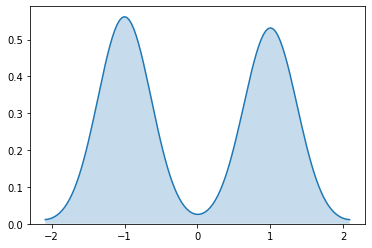

In [11]:
# distribution of target values

x = targets
sns.kdeplot(x, shade=True)


In [0]:
#Cropping and Padding up to 80th quartile across all available sequences 

to_pad = 103 # max value from the sequences. It is used to add padding
new_seq = []
for seq in sequences:
    len_seq = len(seq)
    last_val = seq[-1]
    n = to_pad - len_seq
    to_concat = np.repeat(seq[-1], n).reshape(4, n).transpose()
    new_one_seq = np.concatenate([seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

#truncate the sequence to length 27
from keras.preprocessing import sequence
seq_len = 27
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')


In [0]:
# Make train and test sets. 
#The validation set for the base model is the same as the test set.  

train = [final_seq[i] for i in range(1,137)]
test = [final_seq[i] for i in range(138,172)]

train_target = [targets[i] for i in range(1,137)]
test_target = [targets[i] for i in range(138,172)]

In [14]:

train = np.array(train)
test = np.array(test)

train_target = np.array(train_target)
train_target = (train_target+1)/2

test_target = np.array(test_target)
test_target = (test_target+1)/2

print('train: ',len(train))
print('target: ',len(train_target))
print('test: ',len(test))
print('target: ',len(test_target))


train:  136
target:  136
test:  34
target:  34


In [0]:
# function for plotting the performance of each epoch

def plot_histogram_of_performance(history_m):
  # print(history_m.history.keys())
  # print(history_m.history)

  # summarize history for accuracy
  plt.figure(figsize=(12, 8))
  plt.plot(history_m.history['acc'])
  plt.plot(history_m.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.figure(figsize=(12, 8))
  plt.plot(history_m.history['loss'])
  plt.plot(history_m.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


## 2.	Develop a long short-term memory (LSTM) recurrent neural network model

For the implementation, we use KERAS Deep Learning library to develop an LSTM model. The implementation's approach is to create a base model in a generic function that can accept optional parameters. The generic function is called **lstm_model()** and has three optional -hyper- parameters that you can adjust the **LSTM** model before you perform fit. Additionally, as a baseline to the model, we consider an **adam** optimizer and checkpoint that retains the best outcome of every epoch. Hence, every tuning that we are going to perform later on, will be along with that parametrisation. 


In [0]:
def lstm_model(n_neurons = 256 ,loss_f = 'binary_crossentropy', activation_f = 'sigmoid'):
   
  """
  n_neurons = units in LSTM model. 
  We consider 256 as a suitable number of dimensions of 
  the output space in regards to the time-series dataset.

  loss_f = for binary classification we use binary_crossentropy. 
  We consider it a good combination with the ouput of sigmoid activation
  function and therefore it prevents over or underflow numbers outcome.

  activation_f = activation function.  We consider sigmoid 
  for the base configuration as the output can be determined 
  by either let no flow or entire flow of information to outcome. 
  It is a good indication of observing the performance of the model.

-- Internal hyper parameters configuration --
  Adam optimizer for optimising the weight parameters and minimise the loss function.
  We consider adam optimiser due to its robustness and fitness with our case. 
  Also, we prefer 0.001 learning rate for the time-series dataset. 

  """
   
  model = Sequential()
  model.add(LSTM(n_neurons, input_shape=(seq_len, 4)))
  model.add(Dense(1, activation= activation_f))
  adam = Adam(lr=0.001)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [0]:
# final_seq

In [18]:
chk = ModelCheckpoint('best_model_base.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
_lstm_base_model = lstm_model()
lstm_history = _lstm_base_model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(test,test_target))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 136 samples, validate on 34 samples
Epoch 1/200





136/136 [==============================] - 2s 12ms/step - loss: 0.6979 - acc: 0.3750 - val_loss: 0.6740 - val_acc: 0.7353

Epoch 00001: val_acc improved from -inf to 0.73529, saving model to best_model_base.pkl
Epoch 2/200
136/136 [==============================] - 0s 716us/step - loss: 0.6739 - acc: 0.6985 - val_loss: 0.6461 - val_acc: 0.7353

Epoch 00002: val_acc did not improve from 0.73529
Epoch 3/200
136/136 [==============================] - 0s 682us/step - loss: 0.6504 - acc: 0.6912 - val_loss: 0.6381 - val_acc: 0.7353

Epoch 00003: val_acc did not improve from 0.73529
Epoch 4/200
136/136 [==============================] - 0s 681us/step - loss: 0.6098 - acc: 0.7206 - val_loss: 0.7093 - val_acc: 0.5882

Epoch 00004: val_acc did not improve from 0.73529
Epoch 5/200
136/136 [==============================] - 0s 700us/ste

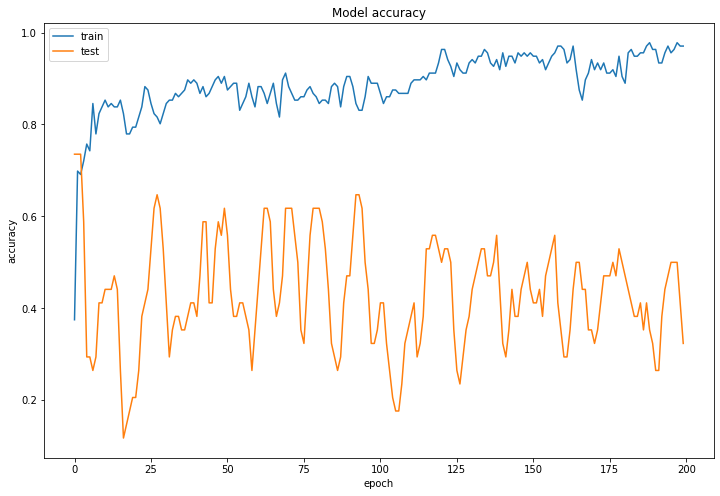

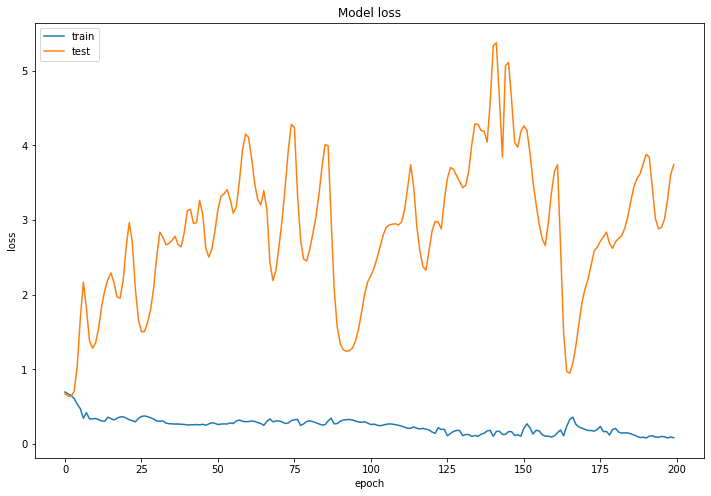

In [19]:
plot_histogram_of_performance(lstm_history)

In [20]:
#loading the model and scoring the accuracy on the test data

_lstm_model = load_model('best_model_base.pkl')

from sklearn.metrics import accuracy_score
test_preds = _lstm_model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.7352941176470589

## 3. 10 Fold Validation 


In [0]:
def plot_bar_KFold_score(cvscores):
  scores = pd.DataFrame(cvscores,columns=['Accuracy'])

  
# generate labels
  x =[]

  for i in range(len(scores)):
    x.append('kfold-'+ str(i+1))

  sns.set(style="white", rc={"lines.linewidth": 3})
  plt.figure(figsize=(15,8))
  sns.barplot(x,y="Accuracy",data=scores)
  plt.ylim(0, 100)
  # plot the metrics
  plt.axhline(y = max(scores['Accuracy']), alpha= 0.5, c='r', linestyle= '--', linewidth='1.5')
  plt.axhline(y =(scores['Accuracy'].mean()), alpha= 0.5, c='y',  linestyle= '--', linewidth='1.5')
  plt.axhline(y =(scores['Accuracy'].std()), alpha= 0.5, c='b' , linestyle= '--', linewidth='1.5')


  max_point_text = float(max(scores['Accuracy'])*0.01)
  mean_point_text = float((scores['Accuracy'].mean())*0.01)
  std_point_text = float((scores['Accuracy'].std())*0.01)

  print('max: ',max_point_text)
  print('mean: ',mean_point_text)
  print('std: ',std_point_text)

  # annotate the metrics
  
  plt.annotate('max', xy=(3, max_point_text),  xycoords='data',
              xytext=(0.5, max_point_text + 0.05), c='r', textcoords='axes fraction',
              verticalalignment='top', alpha=1
              )

  plt.annotate('mean', xy=(3, mean_point_text),  xycoords='data',
              xytext=(0.7, mean_point_text - 0.025), c='y', textcoords='axes fraction',
              verticalalignment='top',alpha=1
              )

  plt.annotate('std', xy=(3, std_point_text),  xycoords='data',
              xytext=(0.2, std_point_text + 0.05), c='b', textcoords='axes fraction',
              verticalalignment='top', alpha=1
              )

  sns.set()
  plt.show()

In [0]:
# import the KFold library 
from sklearn.model_selection import KFold

In [0]:
def k_Fold(_lstm_k_model, model_name_eval, n_splits = 10, _batch_size = 128):

  """
  _lstm_k_model = lstm model for the cross validation
  model_name_eval = the name of the checkpoint file

  n_splits = number of K-Folds to iteriate 

  _batch_size = the update weight size.
  We consider the size of 128 suitable for the base 
  cross validation due to training and 
  test dataset size.  

  """

  kfold = KFold(n_splits)

  cvscores = []
  i = 0

  #enumerate splits
  for train_k, test_k in kfold.split(final_seq, targets):
      i+=1
      print('\nK-Fold: ', i)

      # _lstm_k_model = lstm_model()
      chk = ModelCheckpoint(model_name_eval + '.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
      lstm_k_history = _lstm_k_model.fit(final_seq[train_k], targets[train_k], epochs=40, batch_size=_batch_size, callbacks=[chk], validation_data=(final_seq[test_k],targets[test_k]))

      #loading the model and calculating accuracy on the test k-fold data
      _lstm_k_model = load_model(model_name_eval +'.pkl')
      test_preds = _lstm_k_model.predict_classes(final_seq[test_k])
    
      print('accuracy: > ', accuracy_score(targets[test_k], test_preds))

      scores = _lstm_k_model.evaluate(final_seq[test_k], targets[test_k], verbose=0)
      print("%s: %.2f%%" % (_lstm_k_model.metrics_names[1], scores[1]*100))
      
      cvscores.append(scores[1] * 100)

      plot_histogram_of_performance(lstm_k_history)
    
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

  return cvscores
 


K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 5ms/step - loss: 0.6702 - acc: 0.1237 - val_loss: 0.7229 - val_acc: 0.0909

Epoch 00001: val_acc improved from -inf to 0.09091, saving model to best_k_model_base.pkl
Epoch 2/40
194/194 [==============================] - 0s 511us/step - loss: 0.5536 - acc: 0.0309 - val_loss: 0.7659 - val_acc: 0.1364

Epoch 00002: val_acc improved from 0.09091 to 0.13636, saving model to best_k_model_base.pkl
Epoch 3/40
194/194 [==============================] - 0s 476us/step - loss: 0.3907 - acc: 0.0361 - val_loss: 0.9488 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.13636
Epoch 4/40
194/194 [==============================] - 0s 520us/step - loss: -0.0936 - acc: 0.0258 - val_loss: 2.2454 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.13636
Epoch 5/40
194/194 [==============================] - 0s 497us/step - loss: -1.0616 - acc: 0.0206 - val_loss: 8.3

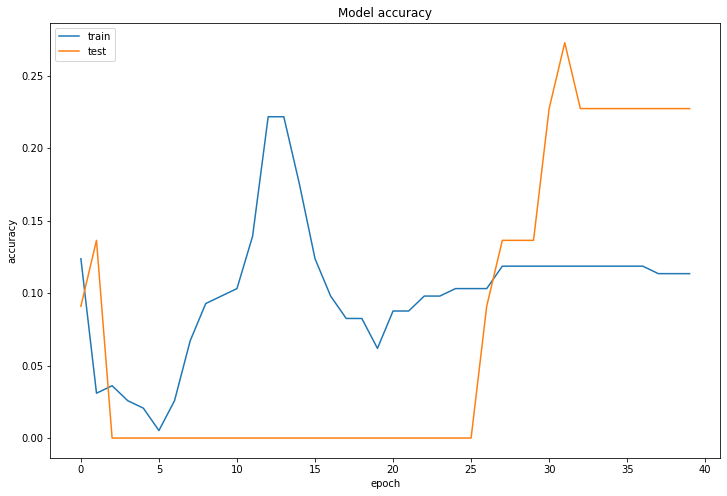

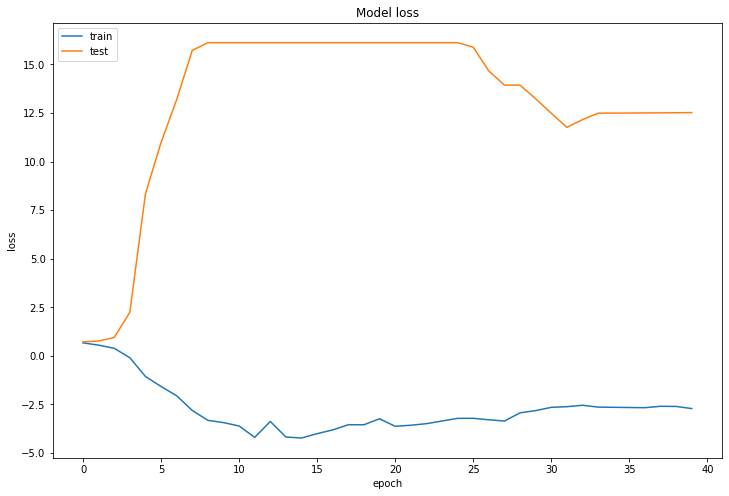


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 3ms/step - loss: -0.0423 - acc: 0.1495 - val_loss: -10.2570 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/40
194/194 [==============================] - 0s 529us/step - loss: -0.0119 - acc: 0.1392 - val_loss: -10.2570 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 568us/step - loss: 0.0033 - acc: 0.1546 - val_loss: -10.2570 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 487us/step - loss: -4.3100e-04 - acc: 0.1598 - val_loss: -10.9895 - val_acc: 0.0909

Epoch 00004: val_acc improved from 0.00000 to 0.09091, saving model to best_k_model_base.pkl
Epoch 5/40
194/194 [==============================] - 0s 536us/step - loss: -0.2057 - acc: 0.20

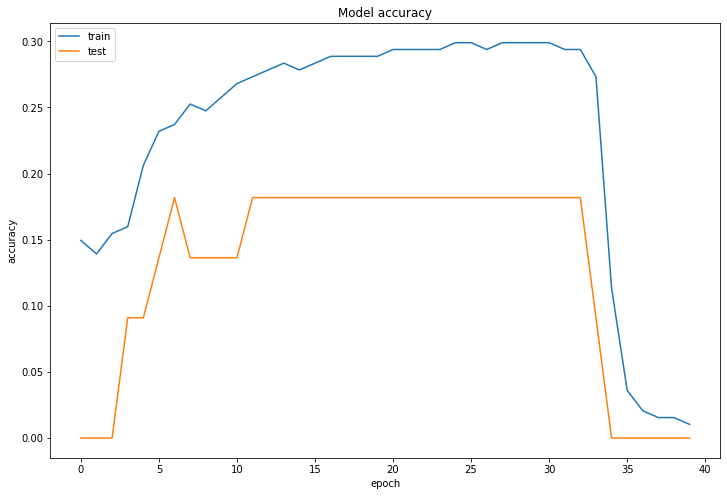

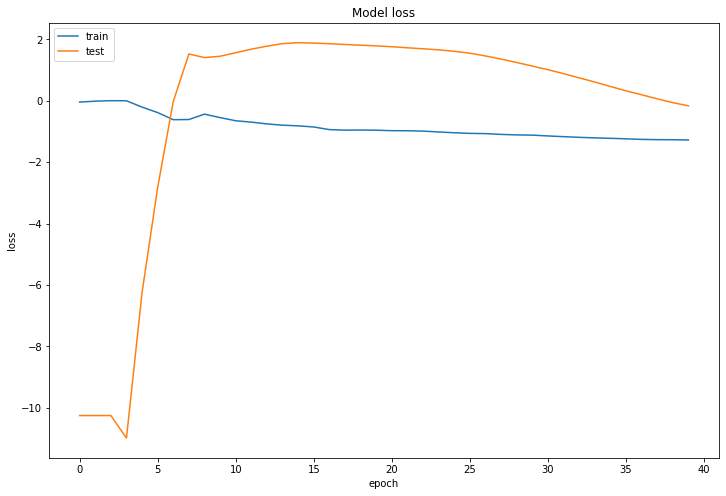


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 3ms/step - loss: 0.6601 - acc: 0.2732 - val_loss: -9.1246 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/40
194/194 [==============================] - 0s 520us/step - loss: 0.5781 - acc: 0.2680 - val_loss: -8.5726 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 488us/step - loss: 0.5314 - acc: 0.2629 - val_loss: -8.7617 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 521us/step - loss: 0.4454 - acc: 0.2577 - val_loss: -8.8288 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 531us/step - loss: 0.4097 - acc: 0.2474 - val_loss: -8.7072 - val_acc: 0.0000e+00

Epoch

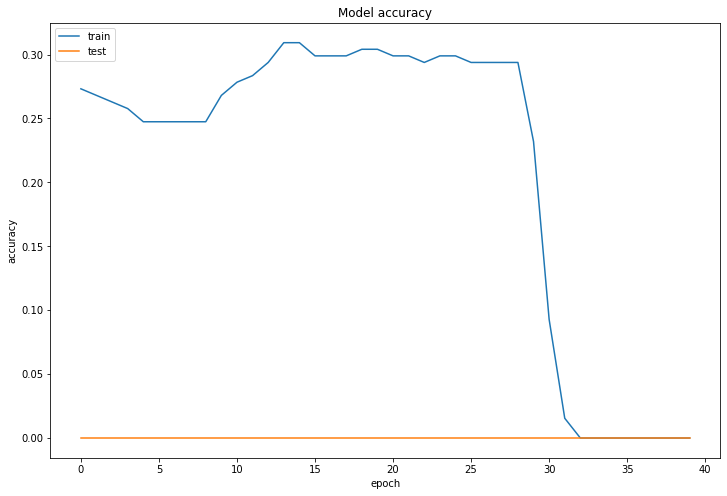

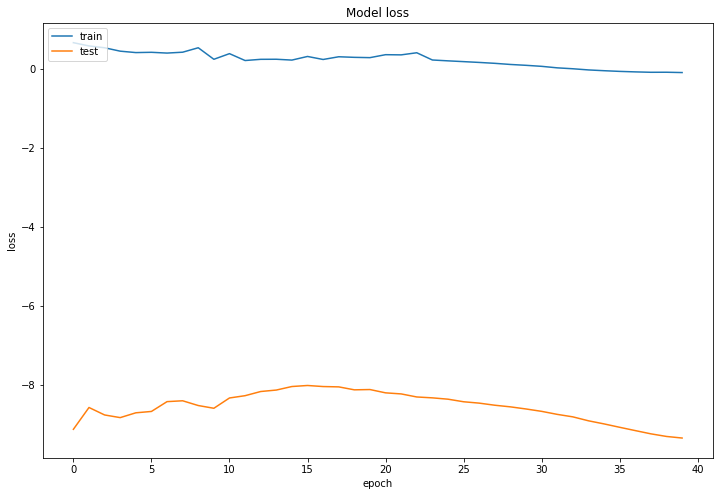


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 3ms/step - loss: -2.2919 - acc: 0.2680 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/40
194/194 [==============================] - 0s 542us/step - loss: -2.3005 - acc: 0.2577 - val_loss: 16.1101 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 523us/step - loss: -2.3884 - acc: 0.2577 - val_loss: 16.1021 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 526us/step - loss: -2.4314 - acc: 0.2165 - val_loss: 16.1000 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 498us/step - loss: -2.4372 - acc: 0.1856 - val_loss: 15.3708 - val_acc: 0.0455

Epoc

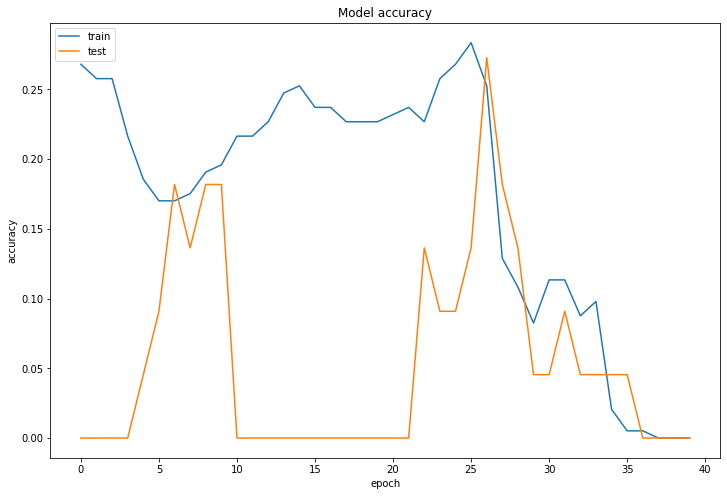

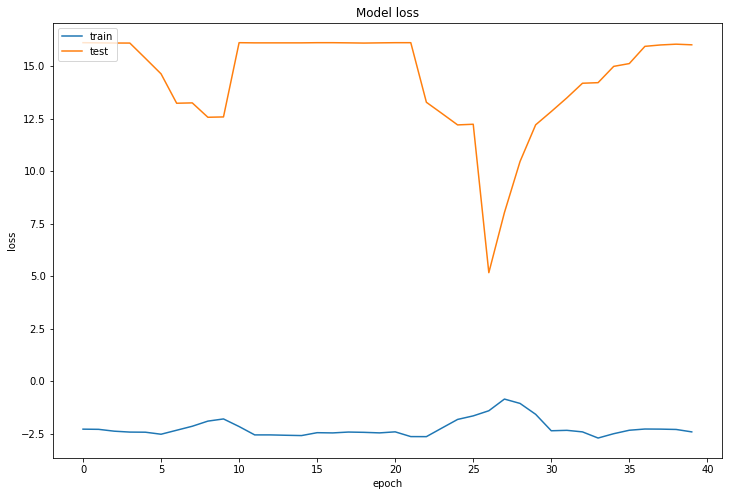


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 3ms/step - loss: 0.4309 - acc: 0.1598 - val_loss: -7.7685 - val_acc: 0.2273

Epoch 00001: val_acc improved from -inf to 0.22727, saving model to best_k_model_base.pkl
Epoch 2/40
194/194 [==============================] - 0s 506us/step - loss: 0.9792 - acc: 0.1134 - val_loss: -3.4874 - val_acc: 0.2273

Epoch 00002: val_acc did not improve from 0.22727
Epoch 3/40
194/194 [==============================] - 0s 498us/step - loss: 0.7328 - acc: 0.1186 - val_loss: 0.5830 - val_acc: 0.1364

Epoch 00003: val_acc did not improve from 0.22727
Epoch 4/40
194/194 [==============================] - 0s 478us/step - loss: 0.4006 - acc: 0.1340 - val_loss: 1.1209 - val_acc: 0.1364

Epoch 00004: val_acc did not improve from 0.22727
Epoch 5/40
194/194 [==============================] - 0s 543us/step - loss: 0.2352 - acc: 0.1186 - val_loss: 1.1655 - val_acc: 0.1364

Epoch 00005: val_acc did not

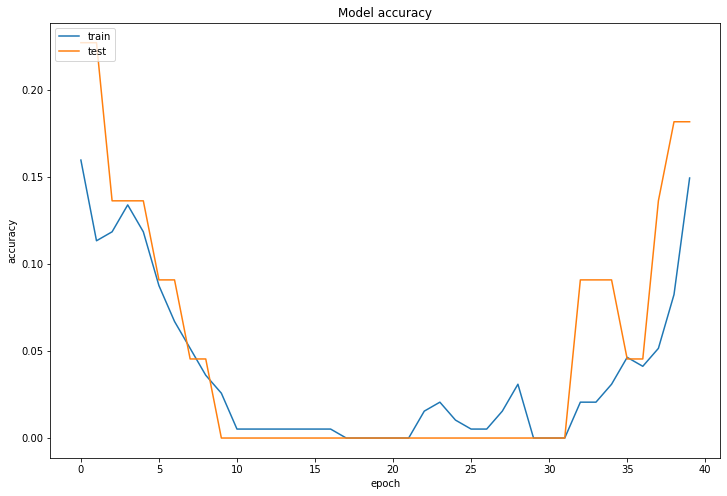

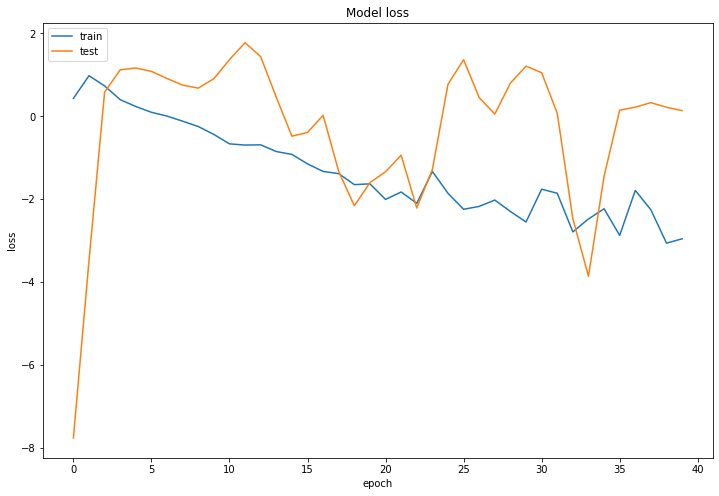


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 4ms/step - loss: -0.0622 - acc: 0.0876 - val_loss: 1.4778 - val_acc: 0.1818

Epoch 00001: val_acc improved from -inf to 0.18182, saving model to best_k_model_base.pkl
Epoch 2/40
194/194 [==============================] - 0s 518us/step - loss: 0.1191 - acc: 0.1186 - val_loss: 1.9034 - val_acc: 0.1364

Epoch 00002: val_acc did not improve from 0.18182
Epoch 3/40
194/194 [==============================] - 0s 492us/step - loss: 0.1735 - acc: 0.1186 - val_loss: 2.4521 - val_acc: 0.1364

Epoch 00003: val_acc did not improve from 0.18182
Epoch 4/40
194/194 [==============================] - 0s 487us/step - loss: 0.1019 - acc: 0.0773 - val_loss: 3.3057 - val_acc: 0.0909

Epoch 00004: val_acc did not improve from 0.18182
Epoch 5/40
194/194 [==============================] - 0s 517us/step - loss: -0.1322 - acc: 0.0670 - val_loss: 4.5759 - val_acc: 0.0909

Epoch 00005: val_acc did not

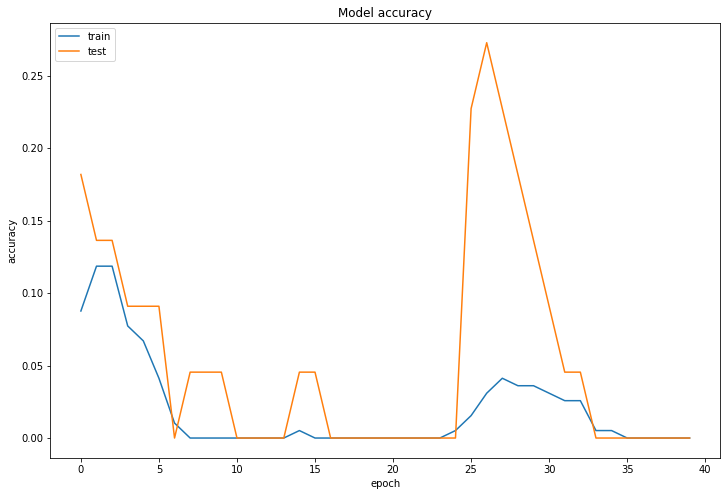

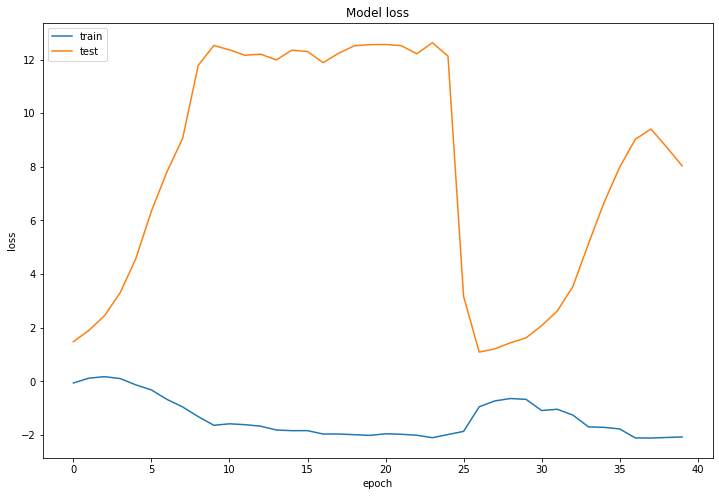


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 4ms/step - loss: 0.3144 - acc: 0.0667 - val_loss: -7.3825 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/40
195/195 [==============================] - 0s 513us/step - loss: 0.2295 - acc: 0.0615 - val_loss: -5.5047 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 574us/step - loss: 0.3254 - acc: 0.0564 - val_loss: -3.5745 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 505us/step - loss: 0.0985 - acc: 0.0564 - val_loss: -2.4107 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 476us/step - loss: -0.0836 - acc: 0.0564 - val_loss: -1.9498 - val_acc: 0.0000e+00

Epoc

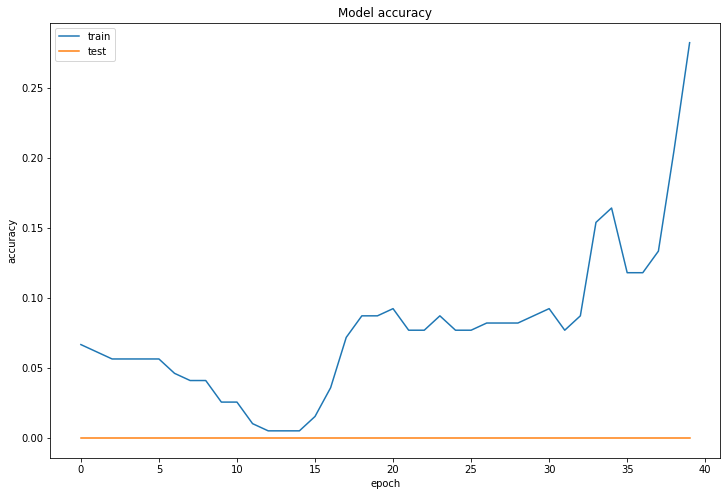

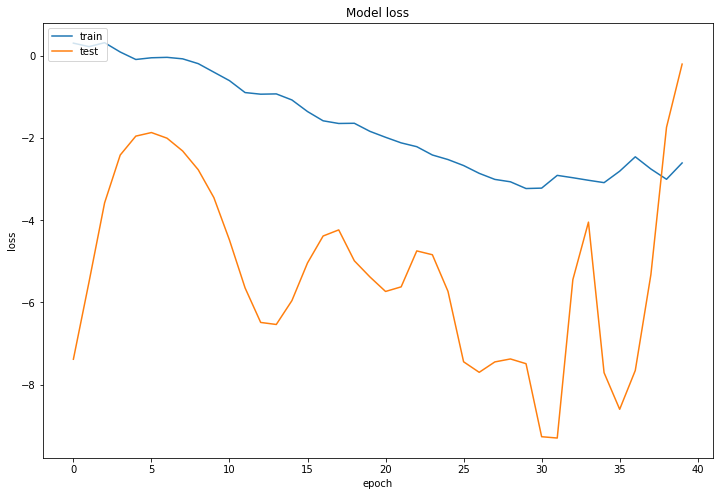


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 4ms/step - loss: -0.1298 - acc: 0.0615 - val_loss: -2.8836 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/40
195/195 [==============================] - 0s 540us/step - loss: 0.0984 - acc: 0.0513 - val_loss: -2.8938 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 522us/step - loss: -0.0278 - acc: 0.0513 - val_loss: -3.0206 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 526us/step - loss: -0.1352 - acc: 0.0513 - val_loss: -3.1562 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 519us/step - loss: -0.1855 - acc: 0.0410 - val_loss: -3.3967 - val_acc: 0.0000e+00

E

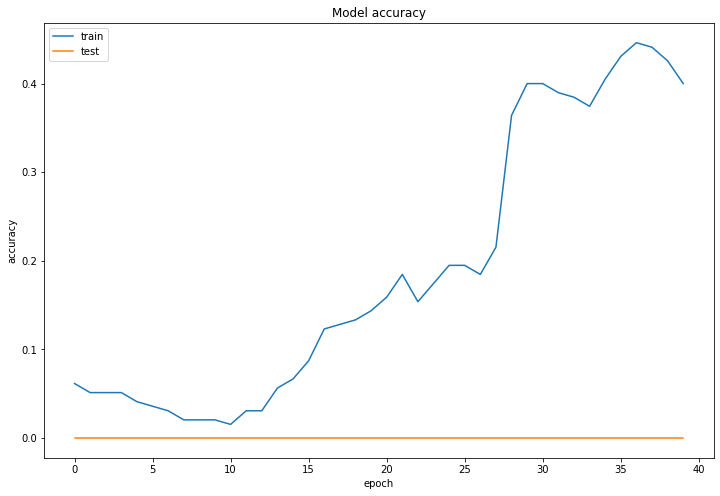

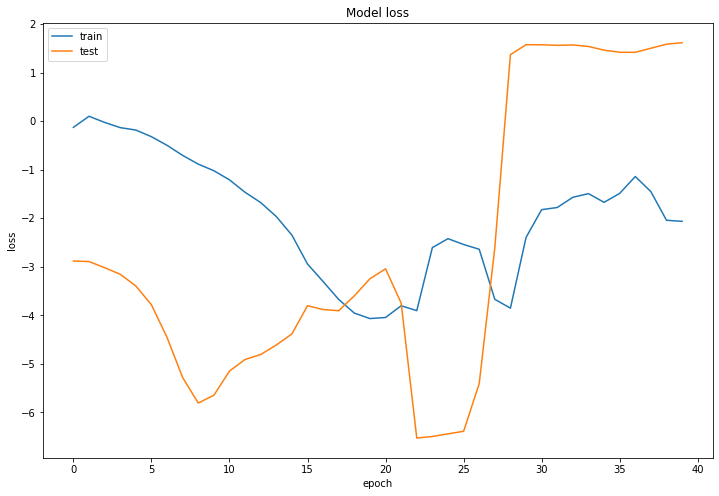


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 4ms/step - loss: -0.6348 - acc: 0.0308 - val_loss: 2.7146 - val_acc: 0.1905

Epoch 00001: val_acc improved from -inf to 0.19048, saving model to best_k_model_base.pkl
Epoch 2/40
195/195 [==============================] - 0s 541us/step - loss: -0.6887 - acc: 0.0308 - val_loss: 2.4821 - val_acc: 0.1905

Epoch 00002: val_acc did not improve from 0.19048
Epoch 3/40
195/195 [==============================] - 0s 530us/step - loss: -0.8502 - acc: 0.0256 - val_loss: 2.8517 - val_acc: 0.0952

Epoch 00003: val_acc did not improve from 0.19048
Epoch 4/40
195/195 [==============================] - 0s 486us/step - loss: -1.1186 - acc: 0.0205 - val_loss: 4.2271 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.19048
Epoch 5/40
195/195 [==============================] - 0s 492us/step - loss: -1.5566 - acc: 0.0103 - val_loss: 7.0290 - val_acc: 0.0000e+00

Epoch 00005: val_

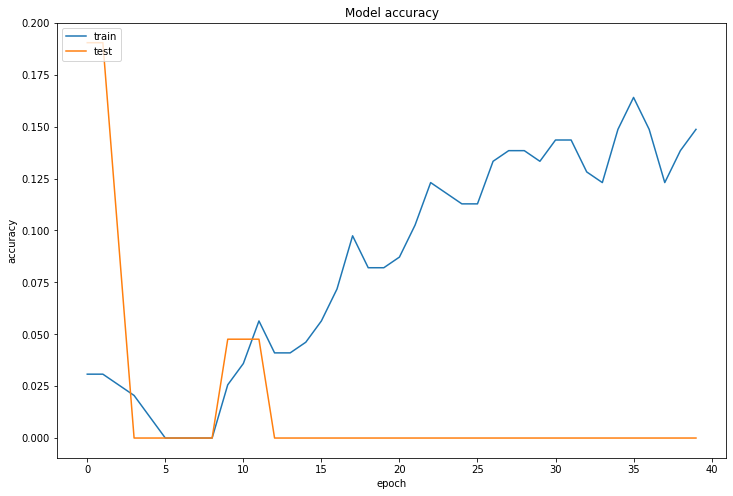

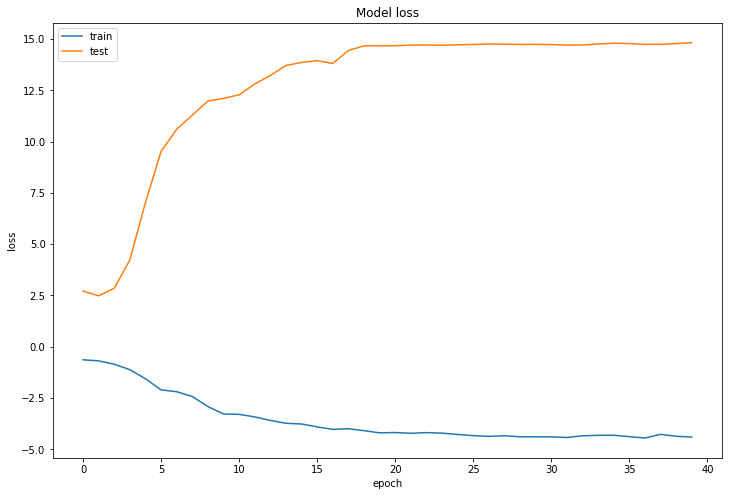


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 4ms/step - loss: -0.5835 - acc: 0.0410 - val_loss: 1.3355 - val_acc: 0.0952

Epoch 00001: val_acc improved from -inf to 0.09524, saving model to best_k_model_base.pkl
Epoch 2/40
195/195 [==============================] - 0s 565us/step - loss: -0.6631 - acc: 0.0359 - val_loss: 0.9283 - val_acc: 0.0952

Epoch 00002: val_acc did not improve from 0.09524
Epoch 3/40
195/195 [==============================] - 0s 486us/step - loss: -0.7933 - acc: 0.0256 - val_loss: 0.5045 - val_acc: 0.0952

Epoch 00003: val_acc did not improve from 0.09524
Epoch 4/40
195/195 [==============================] - 0s 500us/step - loss: -1.0263 - acc: 0.0154 - val_loss: -0.2078 - val_acc: 0.0476

Epoch 00004: val_acc did not improve from 0.09524
Epoch 5/40
195/195 [==============================] - 0s 499us/step - loss: -1.2192 - acc: 0.0051 - val_loss: -1.1643 - val_acc: 0.0476

Epoch 00005: val_acc d

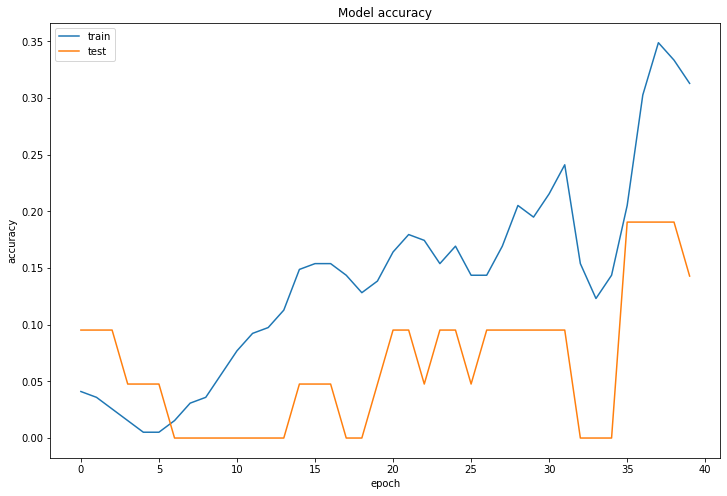

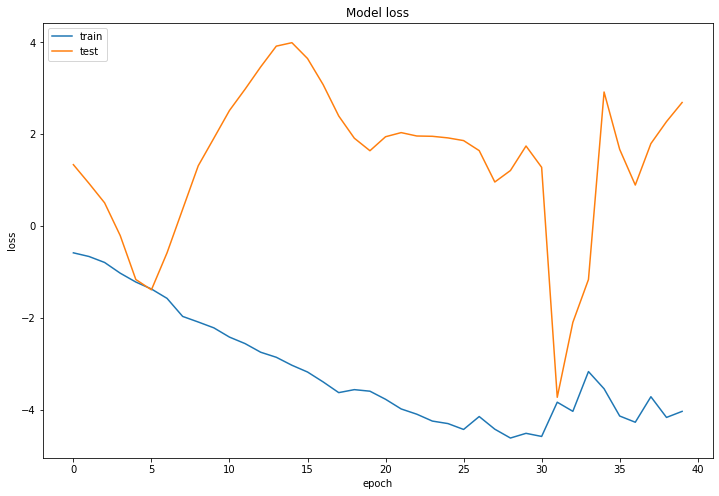

16.08% (+/- 11.04%)


In [24]:
_lstm_k_simple_model = lstm_model()
cvscores_simple_model = k_Fold(_lstm_k_simple_model, 'best_k_model_base')

#### Accuracy Score Plot in K-Fold Cross Validation

max:  0.27272728085517883
mean:  0.16082251518964769
std:  0.11632082314746932


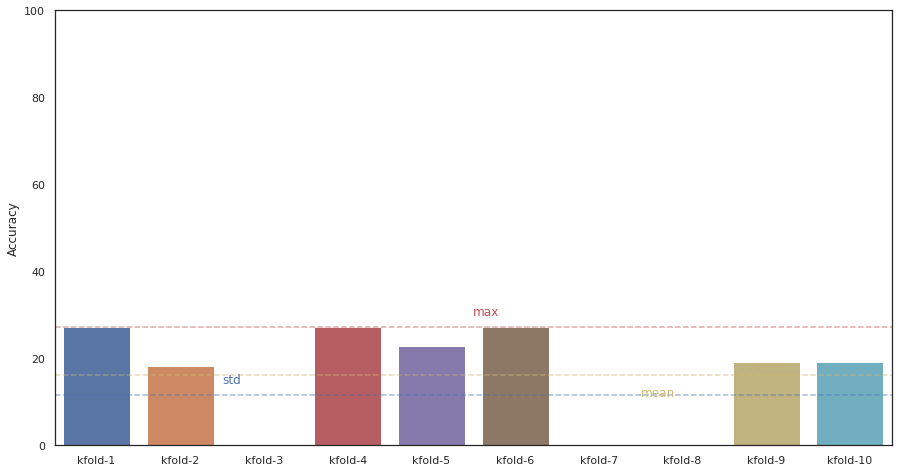

In [25]:
plot_bar_KFold_score(cvscores_simple_model)

## 4.	Implementation of three different lstm models

### 4.1 Adjusting activation function

Instead of utilising activation **sigmoid** function where the output can be determined  by either let no flow or entire flow of information to outcome, we employ **Tanh**. With **Tanh** we attempt to overcome the vanishing gradient problem which has second derivative that can sustain information for a long range prior reaches to zero (no information).




In [26]:
_lstm_activation_model = lstm_model(activation_f='tanh')
chk = ModelCheckpoint('best_model_activation.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
lstm_activation_m_history = _lstm_activation_model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_activation_model = load_model('best_model_activation.pkl')
test_preds = _lstm_activation_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 3s 23ms/step - loss: 5.7898 - acc: 0.4338 - val_loss: 0.2543 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to best_model_activation.pkl
Epoch 2/200
136/136 [==============================] - 0s 755us/step - loss: 3.7184 - acc: 0.4412 - val_loss: 0.4841 - val_acc: 0.5882

Epoch 00002: val_acc did not improve from 1.00000
Epoch 3/200
136/136 [==============================] - 0s 692us/step - loss: 2.8197 - acc: 0.4559 - val_loss: 0.6401 - val_acc: 0.4706

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/200
136/136 [==============================] - 0s 705us/step - loss: 2.2527 - acc: 0.5000 - val_loss: 0.7359 - val_acc: 0.4706

Epoch 00004: val_acc did not improve from 1.00000
Epoch 5/200
136/136 [==============================] - 0s 716us/step - loss: 1.9805 - acc: 0.5074 - val_loss: 0.7084 - val_acc: 0.4706

Epoch 00005: val_acc did not imp

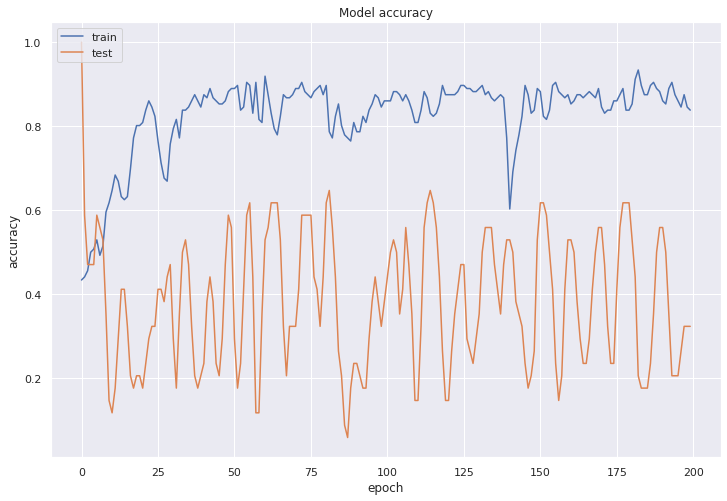

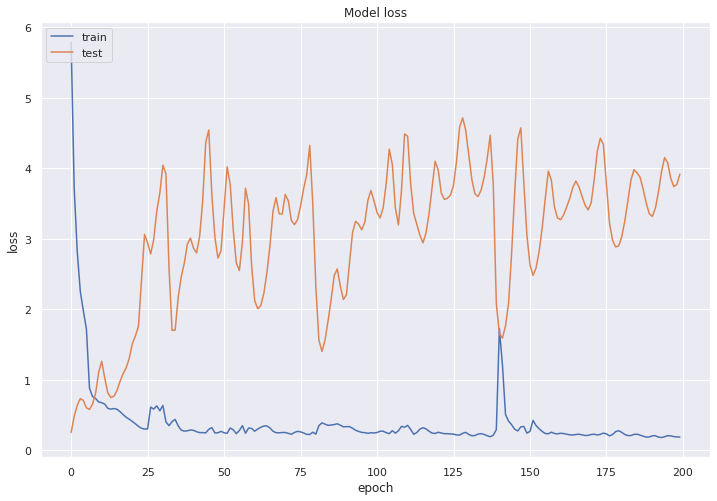

In [27]:
plot_histogram_of_performance(lstm_activation_m_history)

###10 Fold Validation 



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 4s 18ms/step - loss: -2.6637 - acc: 0.0000e+00 - val_loss: 10.6616 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_activation.pkl
Epoch 2/40
194/194 [==============================] - 0s 516us/step - loss: -2.6768 - acc: 0.0000e+00 - val_loss: 14.9174 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 487us/step - loss: -3.0330 - acc: 0.0000e+00 - val_loss: 14.4087 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 568us/step - loss: -2.7317 - acc: 0.0000e+00 - val_loss: 14.3398 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 497us/step - loss: -2.6116 - acc: 0.0567 - val_loss: 14.3095 

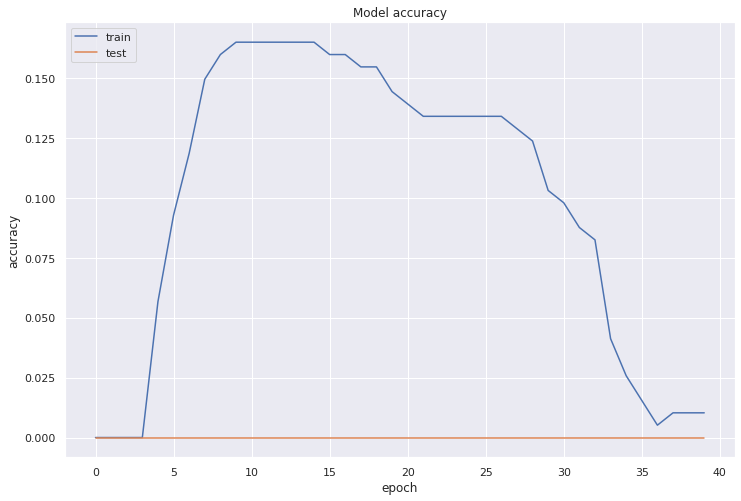

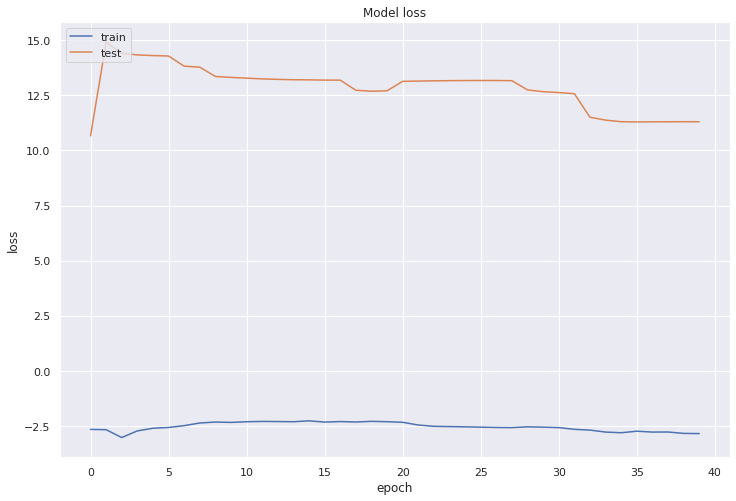


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 5ms/step - loss: -0.8869 - acc: 0.0000e+00 - val_loss: -2.6484 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_activation.pkl
Epoch 2/40
194/194 [==============================] - 0s 525us/step - loss: -1.6981 - acc: 0.0000e+00 - val_loss: -7.1607 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 502us/step - loss: -1.2746 - acc: 0.0000e+00 - val_loss: -10.9474 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 505us/step - loss: -1.3146 - acc: 0.0000e+00 - val_loss: -11.4838 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 603us/step - loss: -1.4104 - acc: 0.0000e+00 - val_loss: -11

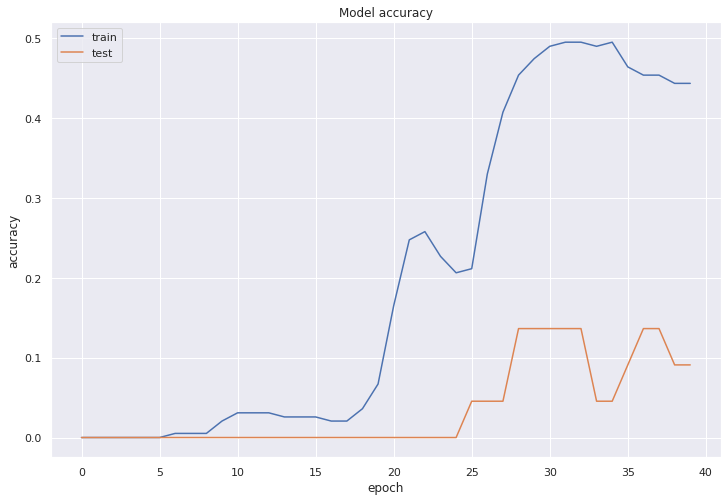

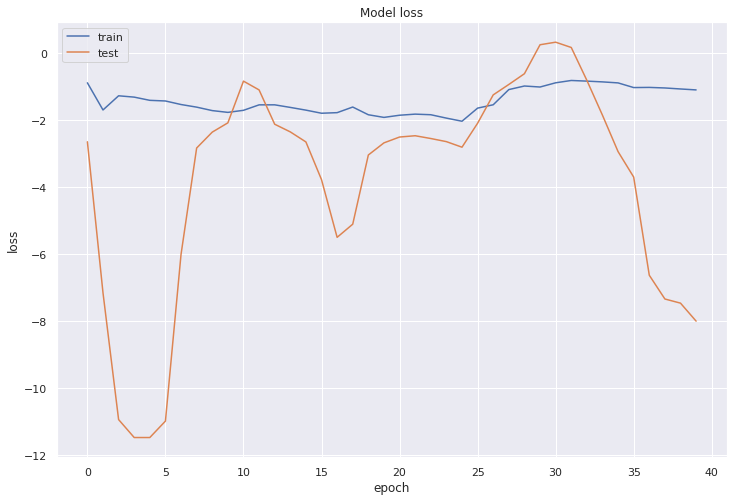


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 5ms/step - loss: 0.3968 - acc: 0.4175 - val_loss: -12.4553 - val_acc: 0.5909

Epoch 00001: val_acc improved from -inf to 0.59091, saving model to best_k_model_activation.pkl
Epoch 2/40
194/194 [==============================] - 0s 506us/step - loss: 0.4224 - acc: 0.4330 - val_loss: -11.9496 - val_acc: 0.5909

Epoch 00002: val_acc did not improve from 0.59091
Epoch 3/40
194/194 [==============================] - 0s 497us/step - loss: 0.4181 - acc: 0.4381 - val_loss: -12.4552 - val_acc: 0.5909

Epoch 00003: val_acc did not improve from 0.59091
Epoch 4/40
194/194 [==============================] - 0s 520us/step - loss: 0.4401 - acc: 0.4381 - val_loss: -12.5476 - val_acc: 0.5909

Epoch 00004: val_acc did not improve from 0.59091
Epoch 5/40
194/194 [==============================] - 0s 599us/step - loss: 0.4404 - acc: 0.4227 - val_loss: -12.7634 - val_acc: 0.5909

Epoch 00005: v

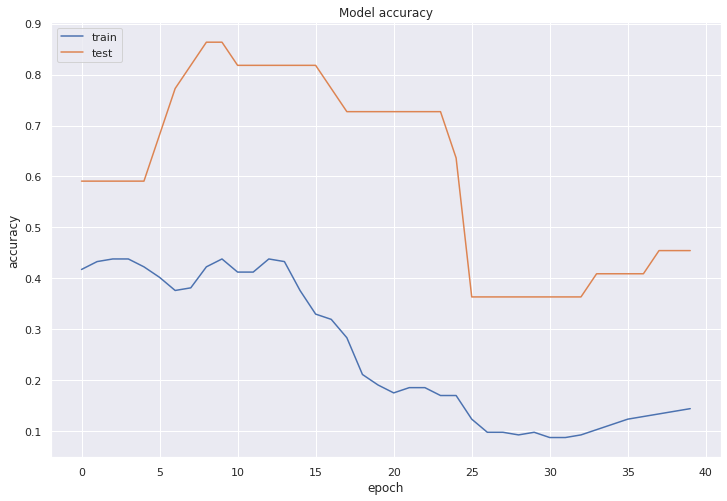

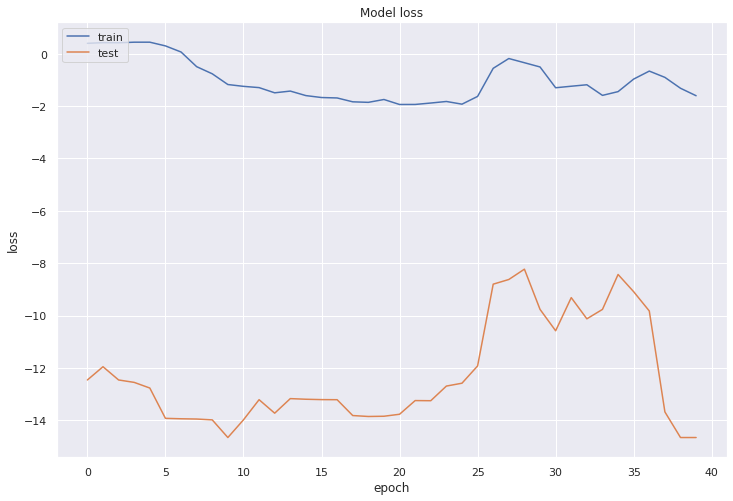


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 5ms/step - loss: -4.0481 - acc: 0.5206 - val_loss: 11.2424 - val_acc: 0.2727

Epoch 00001: val_acc improved from -inf to 0.27273, saving model to best_k_model_activation.pkl
Epoch 2/40
194/194 [==============================] - 0s 517us/step - loss: -4.3866 - acc: 0.4742 - val_loss: 10.4849 - val_acc: 0.2727

Epoch 00002: val_acc did not improve from 0.27273
Epoch 3/40
194/194 [==============================] - 0s 489us/step - loss: -4.1558 - acc: 0.4691 - val_loss: 10.5473 - val_acc: 0.2727

Epoch 00003: val_acc did not improve from 0.27273
Epoch 4/40
194/194 [==============================] - 0s 521us/step - loss: -4.1747 - acc: 0.4742 - val_loss: 11.2915 - val_acc: 0.1818

Epoch 00004: val_acc did not improve from 0.27273
Epoch 5/40
194/194 [==============================] - 0s 509us/step - loss: -4.4984 - acc: 0.4845 - val_loss: 11.9310 - val_acc: 0.0455

Epoch 00005: v

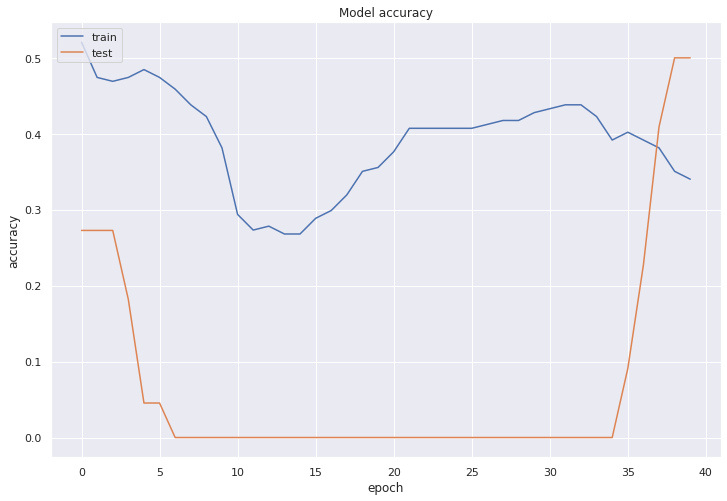

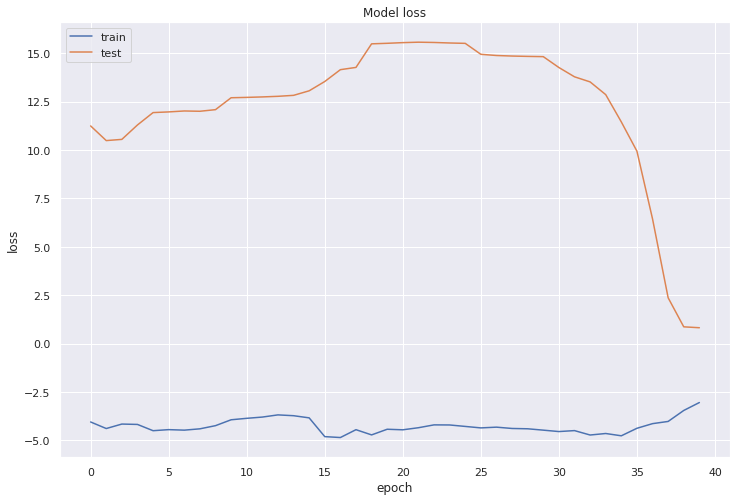


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 6ms/step - loss: -2.6001 - acc: 0.3505 - val_loss: -3.6170 - val_acc: 0.4091

Epoch 00001: val_acc improved from -inf to 0.40909, saving model to best_k_model_activation.pkl
Epoch 2/40
194/194 [==============================] - 0s 505us/step - loss: -2.5007 - acc: 0.3454 - val_loss: -3.6495 - val_acc: 0.4091

Epoch 00002: val_acc did not improve from 0.40909
Epoch 3/40
194/194 [==============================] - 0s 497us/step - loss: -2.5205 - acc: 0.2990 - val_loss: -3.7503 - val_acc: 0.3636

Epoch 00003: val_acc did not improve from 0.40909
Epoch 4/40
194/194 [==============================] - 0s 564us/step - loss: -2.5556 - acc: 0.2629 - val_loss: -3.8723 - val_acc: 0.3636

Epoch 00004: val_acc did not improve from 0.40909
Epoch 5/40
194/194 [==============================] - 0s 482us/step - loss: -2.6460 - acc: 0.2165 - val_loss: -4.6007 - val_acc: 0.3182

Epoch 00005: v

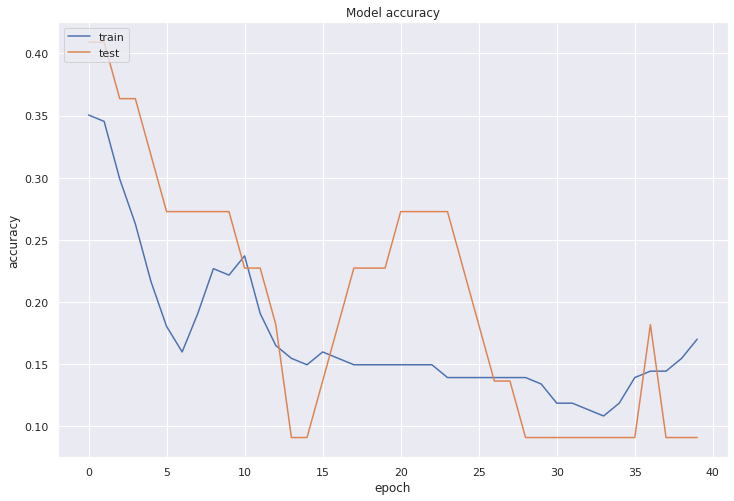

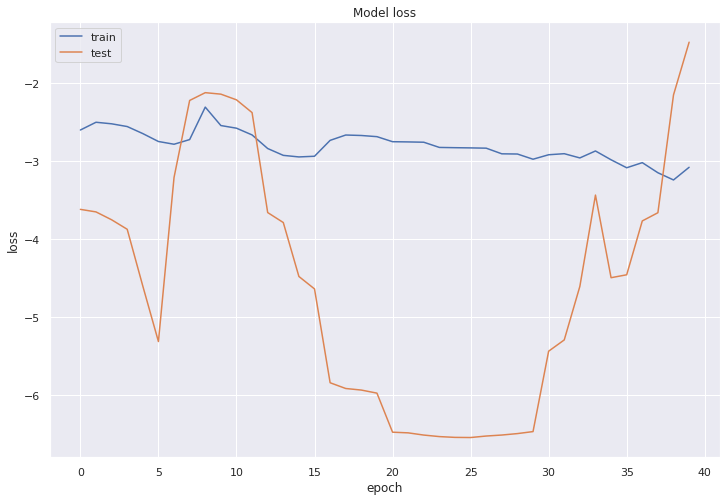


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 6ms/step - loss: -2.8741 - acc: 0.2990 - val_loss: 0.3029 - val_acc: 0.7727

Epoch 00001: val_acc improved from -inf to 0.77273, saving model to best_k_model_activation.pkl
Epoch 2/40
194/194 [==============================] - 0s 515us/step - loss: -2.9297 - acc: 0.2784 - val_loss: -0.1482 - val_acc: 0.7273

Epoch 00002: val_acc did not improve from 0.77273
Epoch 3/40
194/194 [==============================] - 0s 492us/step - loss: -3.0054 - acc: 0.2165 - val_loss: 0.5566 - val_acc: 0.5455

Epoch 00003: val_acc did not improve from 0.77273
Epoch 4/40
194/194 [==============================] - 0s 525us/step - loss: -3.4843 - acc: 0.1753 - val_loss: 0.7259 - val_acc: 0.4091

Epoch 00004: val_acc did not improve from 0.77273
Epoch 5/40
194/194 [==============================] - 0s 543us/step - loss: -3.3182 - acc: 0.2165 - val_loss: 1.9598 - val_acc: 0.3636

Epoch 00005: val_a

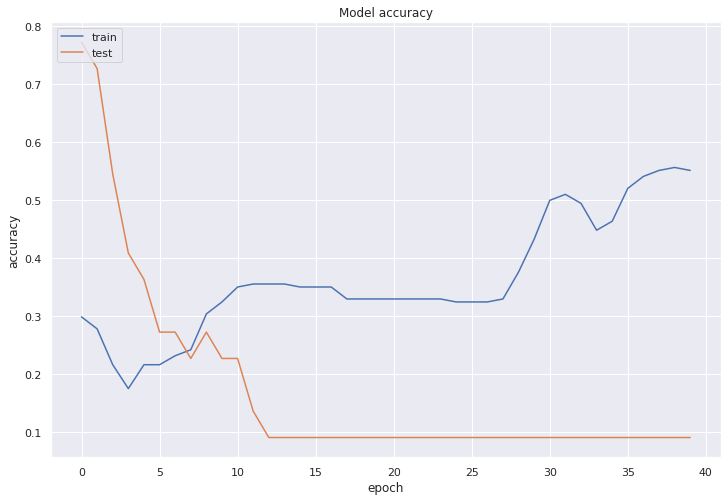

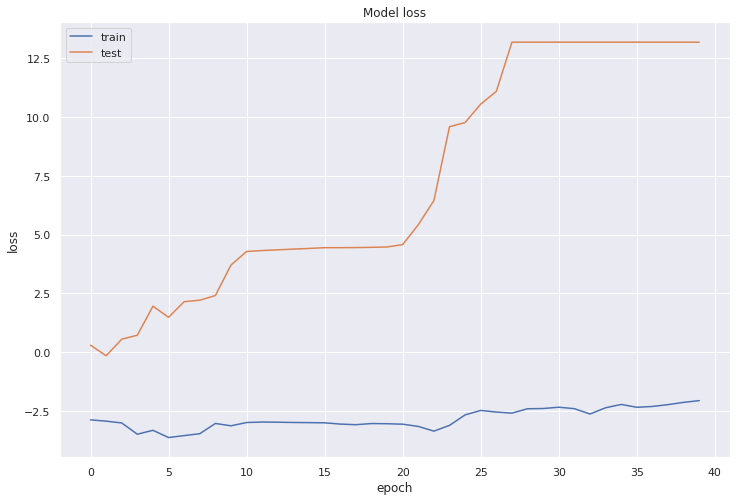


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 6ms/step - loss: -2.6585 - acc: 0.3590 - val_loss: -2.8819 - val_acc: 0.0952

Epoch 00001: val_acc improved from -inf to 0.09524, saving model to best_k_model_activation.pkl
Epoch 2/40
195/195 [==============================] - 0s 536us/step - loss: -2.7282 - acc: 0.2872 - val_loss: -3.6811 - val_acc: 0.0952

Epoch 00002: val_acc did not improve from 0.09524
Epoch 3/40
195/195 [==============================] - 0s 497us/step - loss: -2.7649 - acc: 0.2410 - val_loss: -3.0828 - val_acc: 0.0952

Epoch 00003: val_acc did not improve from 0.09524
Epoch 4/40
195/195 [==============================] - 0s 502us/step - loss: -2.6916 - acc: 0.2256 - val_loss: -2.9345 - val_acc: 0.0952

Epoch 00004: val_acc did not improve from 0.09524
Epoch 5/40
195/195 [==============================] - 0s 507us/step - loss: -2.6732 - acc: 0.2462 - val_loss: -3.5984 - val_acc: 0.0952

Epoch 00005: v

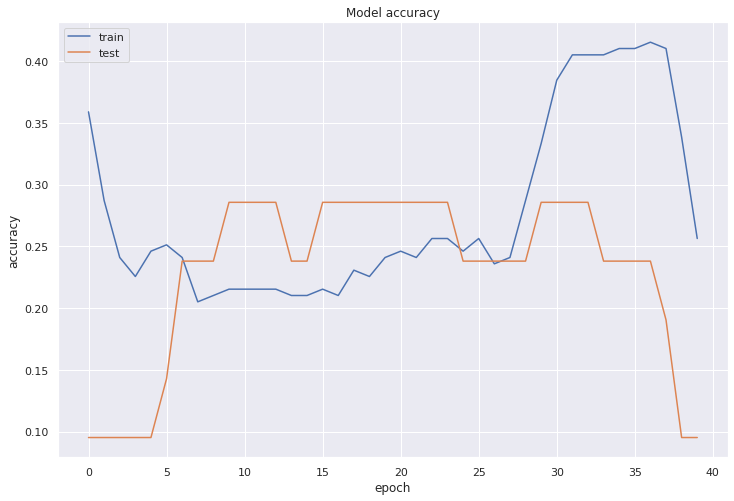

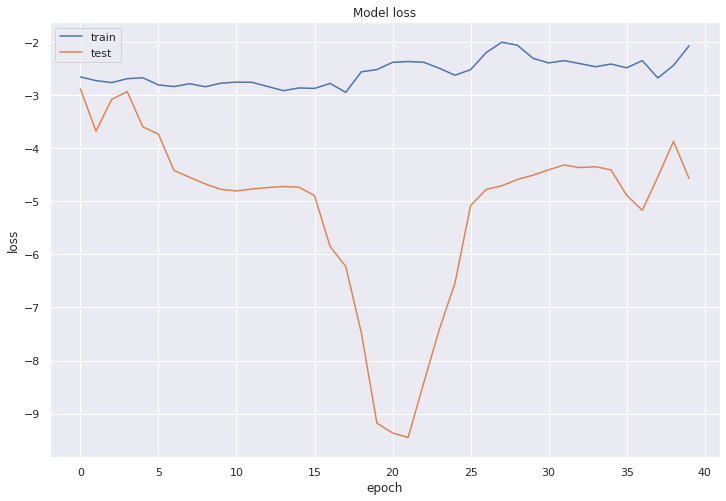


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 6ms/step - loss: -2.9926 - acc: 0.2308 - val_loss: -2.6188 - val_acc: 0.1429

Epoch 00001: val_acc improved from -inf to 0.14286, saving model to best_k_model_activation.pkl
Epoch 2/40
195/195 [==============================] - 0s 531us/step - loss: -2.9987 - acc: 0.2308 - val_loss: -2.6151 - val_acc: 0.1429

Epoch 00002: val_acc did not improve from 0.14286
Epoch 3/40
195/195 [==============================] - 0s 496us/step - loss: -3.0085 - acc: 0.2308 - val_loss: -2.5949 - val_acc: 0.1429

Epoch 00003: val_acc did not improve from 0.14286
Epoch 4/40
195/195 [==============================] - 0s 528us/step - loss: -3.0757 - acc: 0.2308 - val_loss: -2.5764 - val_acc: 0.1429

Epoch 00004: val_acc did not improve from 0.14286
Epoch 5/40
195/195 [==============================] - 0s 582us/step - loss: -3.1512 - acc: 0.2308 - val_loss: -2.5537 - val_acc: 0.1429

Epoch 00005: v

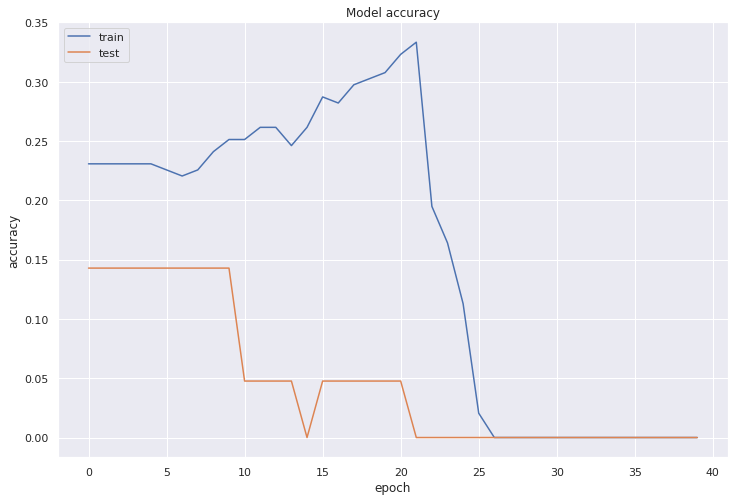

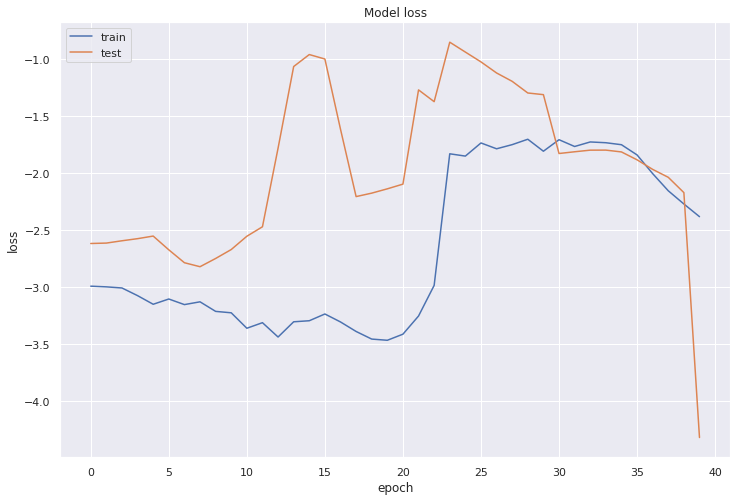


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 6ms/step - loss: -3.3728 - acc: 0.2462 - val_loss: 0.9228 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_activation.pkl
Epoch 2/40
195/195 [==============================] - 0s 531us/step - loss: -3.3964 - acc: 0.2462 - val_loss: 0.9390 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 502us/step - loss: -3.5366 - acc: 0.2308 - val_loss: 0.9626 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 514us/step - loss: -3.5461 - acc: 0.2256 - val_loss: 0.9932 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 558us/step - loss: -3.5669 - acc: 0.2256 - val_loss: 1.0342 - val_acc: 0.0000e+00


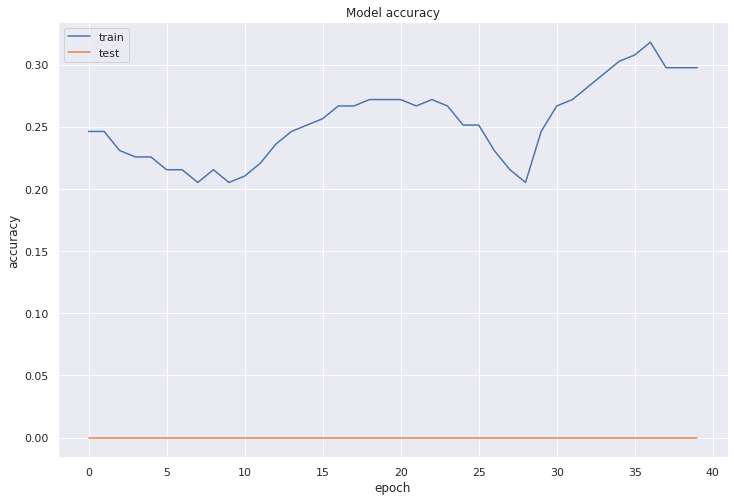

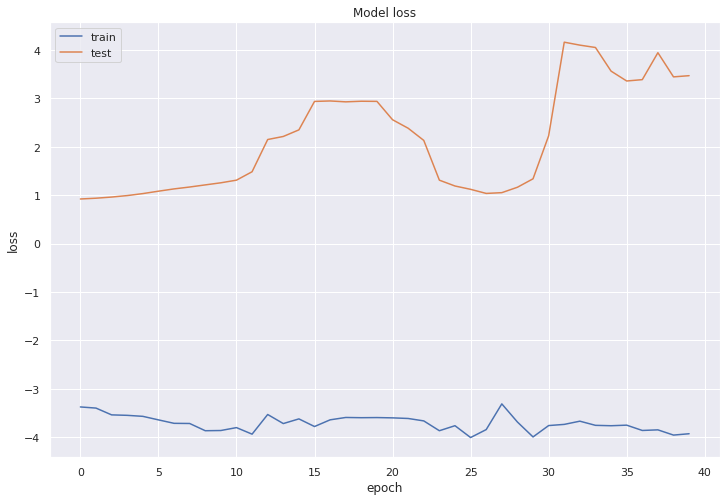


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 1s 6ms/step - loss: -3.3443 - acc: 0.2359 - val_loss: 0.4394 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_model_activation.pkl
Epoch 2/40
195/195 [==============================] - 0s 520us/step - loss: -3.4763 - acc: 0.2308 - val_loss: 0.4122 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 494us/step - loss: -3.5497 - acc: 0.2256 - val_loss: 0.3877 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 491us/step - loss: -3.5502 - acc: 0.2256 - val_loss: 0.1179 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 506us/step - loss: -2.7109 - acc: 0.1385 - val_loss: -0.1523 - val_acc: 0.0000e+0

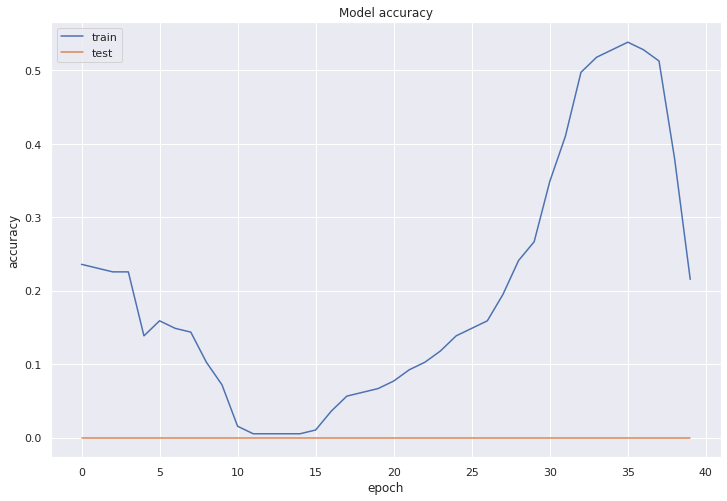

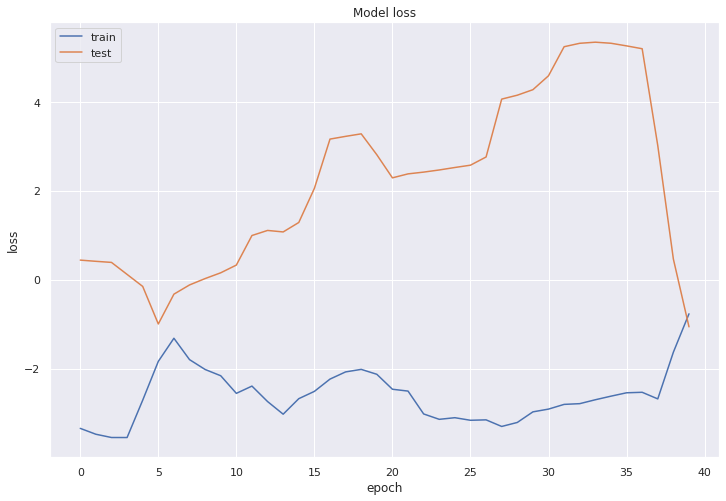

31.10% (+/- 30.22%)


In [28]:
_lstm_k_activation_model = lstm_model(activation_f='tanh')
cvscores_activation_model = k_Fold(_lstm_k_activation_model, 'best_k_model_activation')

#### Accuracy Score Plot in K-Fold Cross Validation for Tanh model

max:  0.8636363744735718
mean:  0.31103896200656894
std:  0.31859310003981256


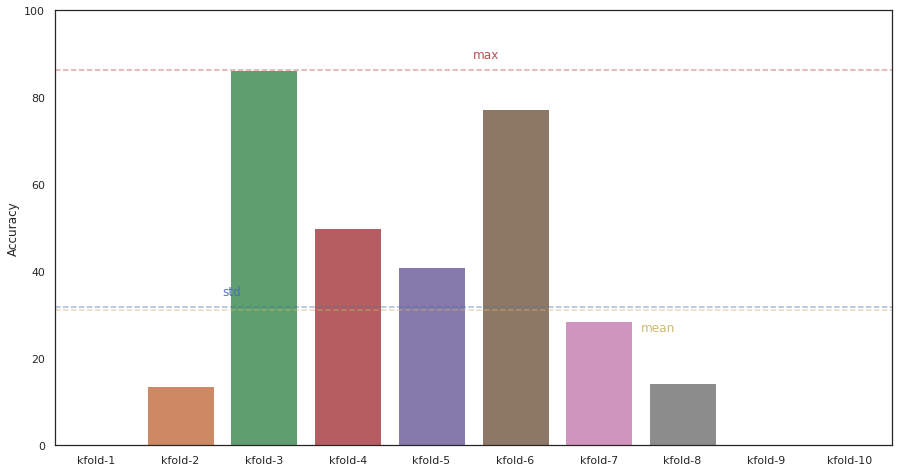

In [29]:
plot_bar_KFold_score(cvscores_activation_model)

### 4.2 Adjusting the Number of Neurons(units)

The learning capacity of the neural network is affected by the **number of neurons** we specify in the **LSTM model**. Typically, the more neurons we add to LSTM, the larger ability to learn the form of the problem. Conversely, the larger number of neurons it has, the higher **impact** in the **training time** it acquires. 



#### Deploying the base model structure with adjustment to the number of neurons in LSTM

In [30]:
_lstm_neurons_model = lstm_model(n_neurons = 100)
chk = ModelCheckpoint('best_model_neurons.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
lstm_neurons_m_history = _lstm_neurons_model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_neurons_model = load_model('best_model_neurons.pkl')
test_preds = _lstm_neurons_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 6s 47ms/step - loss: 0.6928 - acc: 0.5368 - val_loss: 0.7091 - val_acc: 0.1176

Epoch 00001: val_acc improved from -inf to 0.11765, saving model to best_model_neurons.pkl
Epoch 2/200
136/136 [==============================] - 0s 702us/step - loss: 0.6838 - acc: 0.7059 - val_loss: 0.7216 - val_acc: 0.0588

Epoch 00002: val_acc did not improve from 0.11765
Epoch 3/200
136/136 [==============================] - 0s 723us/step - loss: 0.6747 - acc: 0.6544 - val_loss: 0.7271 - val_acc: 0.1765

Epoch 00003: val_acc improved from 0.11765 to 0.17647, saving model to best_model_neurons.pkl
Epoch 4/200
136/136 [==============================] - 0s 738us/step - loss: 0.6652 - acc: 0.7353 - val_loss: 0.7390 - val_acc: 0.1471

Epoch 00004: val_acc did not improve from 0.17647
Epoch 5/200
136/136 [==============================] - 0s 743us/step - loss: 0.6554 - acc: 0.7574 - val_loss: 0.7631 - val_acc:

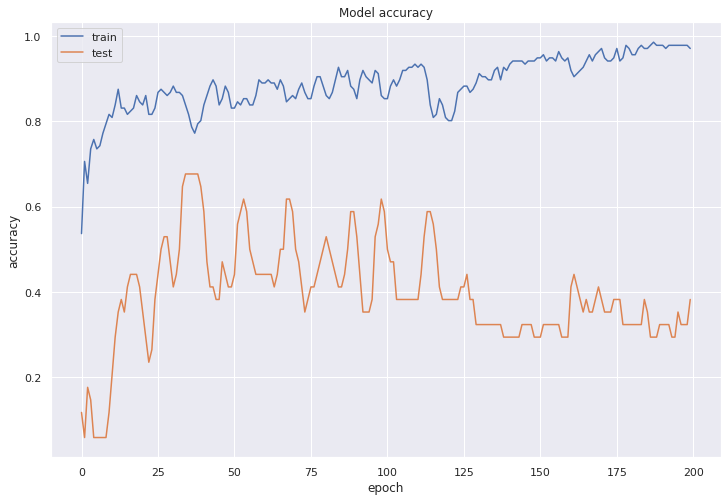

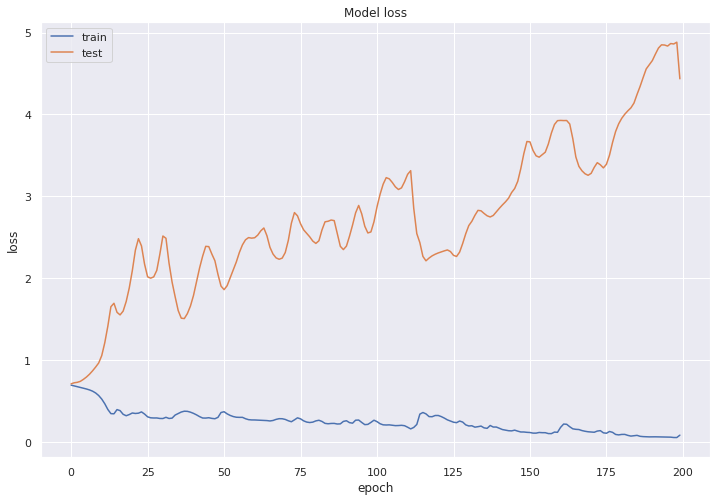

In [31]:
plot_histogram_of_performance(lstm_neurons_m_history)

###10 Fold Validation 



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 6s 33ms/step - loss: 0.6985 - acc: 0.2010 - val_loss: 0.6970 - val_acc: 0.4091

Epoch 00001: val_acc improved from -inf to 0.40909, saving model to best_k_neurons_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 532us/step - loss: 0.6544 - acc: 0.0361 - val_loss: 0.7216 - val_acc: 0.0455

Epoch 00002: val_acc did not improve from 0.40909
Epoch 3/40
194/194 [==============================] - 0s 561us/step - loss: 0.6040 - acc: 0.0052 - val_loss: 0.7609 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.40909
Epoch 4/40
194/194 [==============================] - 0s 516us/step - loss: 0.5395 - acc: 0.0000e+00 - val_loss: 0.8225 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.40909
Epoch 5/40
194/194 [==============================] - 0s 502us/step - loss: 0.4572 - acc: 0.0000e+00 - val_loss: 0.9180 - val_acc: 0.0000e+00

Epoch 

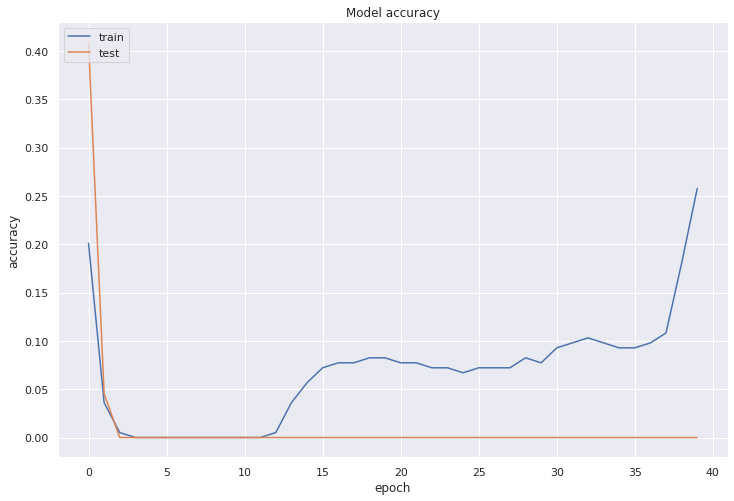

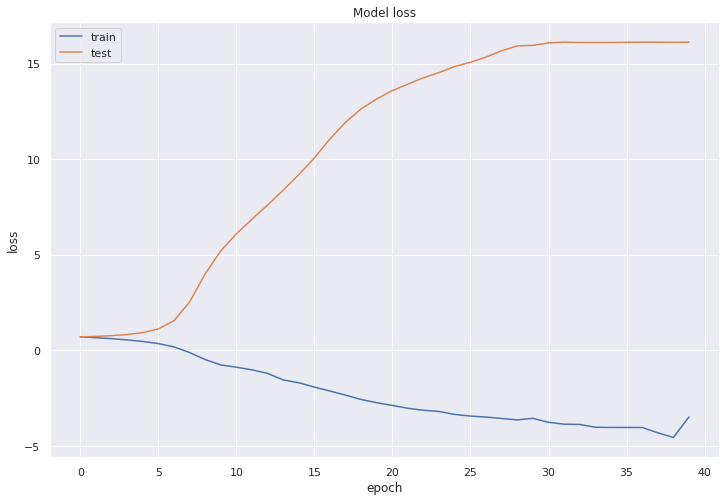


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 7ms/step - loss: 0.6615 - acc: 0.0876 - val_loss: 0.5919 - val_acc: 0.0455

Epoch 00001: val_acc improved from -inf to 0.04545, saving model to best_k_neurons_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 495us/step - loss: 0.6181 - acc: 0.0722 - val_loss: 0.5401 - val_acc: 0.0455

Epoch 00002: val_acc did not improve from 0.04545
Epoch 3/40
194/194 [==============================] - 0s 513us/step - loss: 0.5809 - acc: 0.0722 - val_loss: 0.4942 - val_acc: 0.0455

Epoch 00003: val_acc did not improve from 0.04545
Epoch 4/40
194/194 [==============================] - 0s 582us/step - loss: 0.5257 - acc: 0.0825 - val_loss: 0.4156 - val_acc: 0.0455

Epoch 00004: val_acc did not improve from 0.04545
Epoch 5/40
194/194 [==============================] - 0s 553us/step - loss: 0.4561 - acc: 0.0876 - val_loss: 0.2846 - val_acc: 0.0455

Epoch 00005: val_acc did no

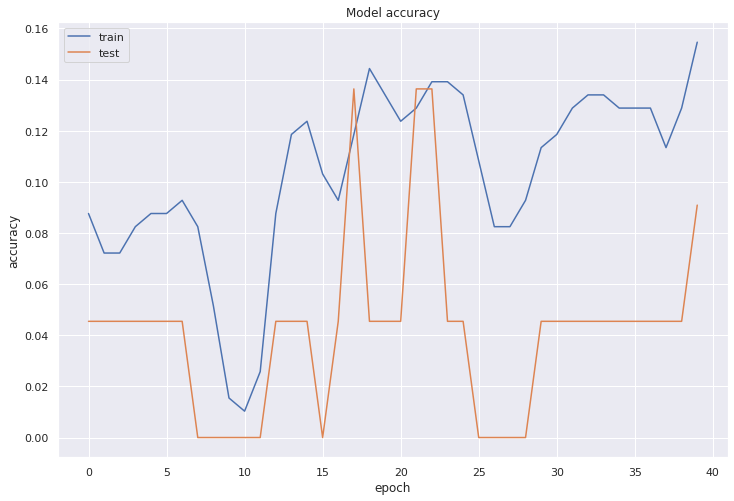

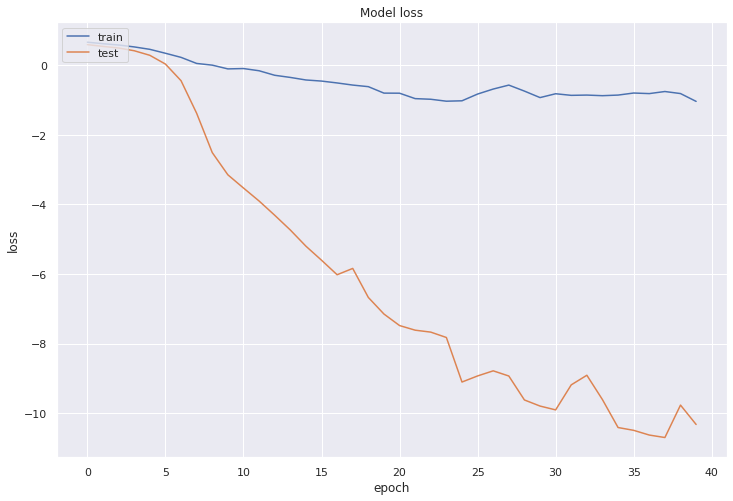


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 8ms/step - loss: -0.2318 - acc: 0.1598 - val_loss: -9.4070 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 519us/step - loss: -0.4504 - acc: 0.1392 - val_loss: -9.7985 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 502us/step - loss: -0.4562 - acc: 0.1237 - val_loss: -10.2257 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 558us/step - loss: -0.4822 - acc: 0.1134 - val_loss: -10.6117 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 539us/step - loss: -0.4549 - acc: 0.1031 - val_loss: -10.9574 - val_acc: 0.0000

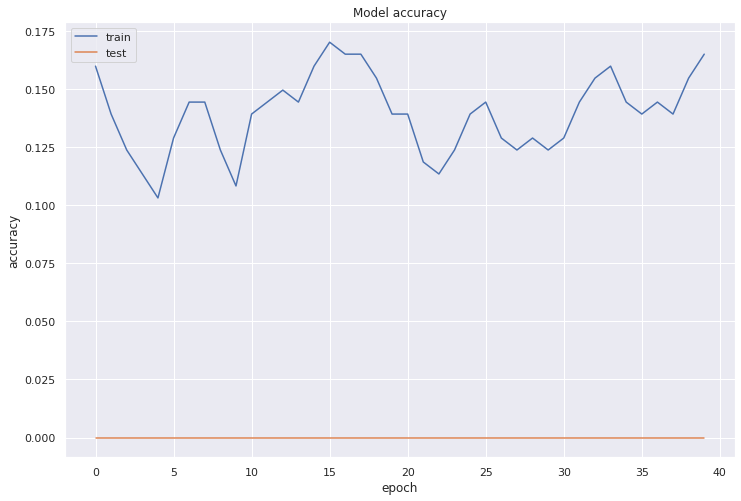

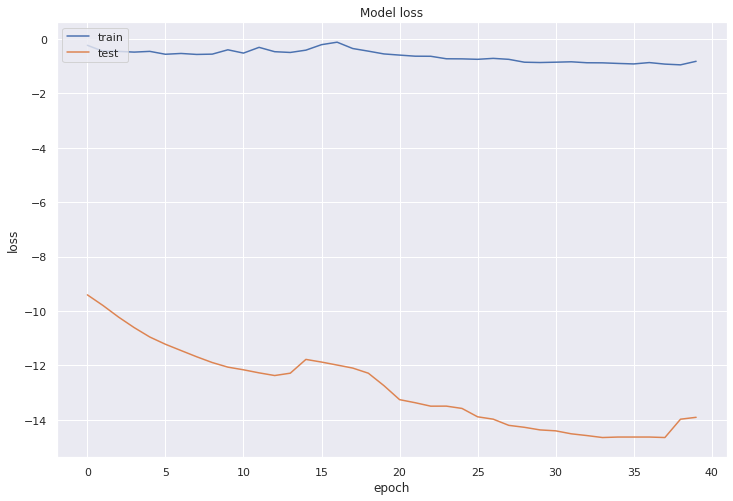


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 8ms/step - loss: -2.7266 - acc: 0.1392 - val_loss: 11.0319 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 536us/step - loss: -2.8901 - acc: 0.1289 - val_loss: 11.8026 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 530us/step - loss: -3.0126 - acc: 0.0979 - val_loss: 12.3780 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 479us/step - loss: -3.2649 - acc: 0.1237 - val_loss: 12.8526 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 527us/step - loss: -3.3131 - acc: 0.1289 - val_loss: 13.2447 - val_acc: 0.0000e+0

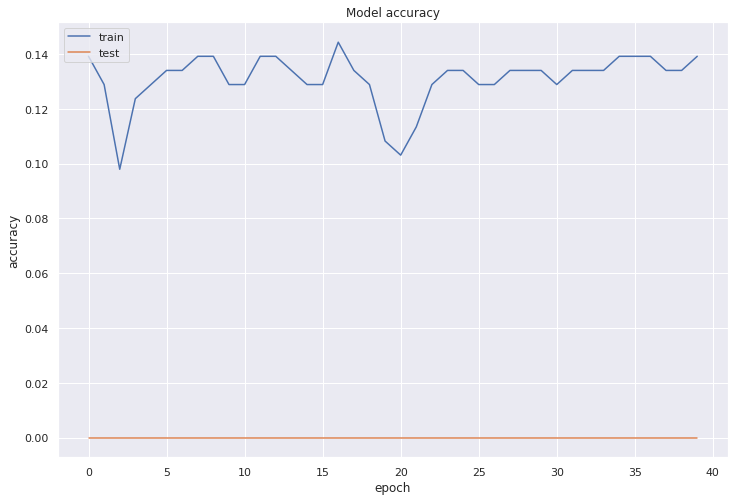

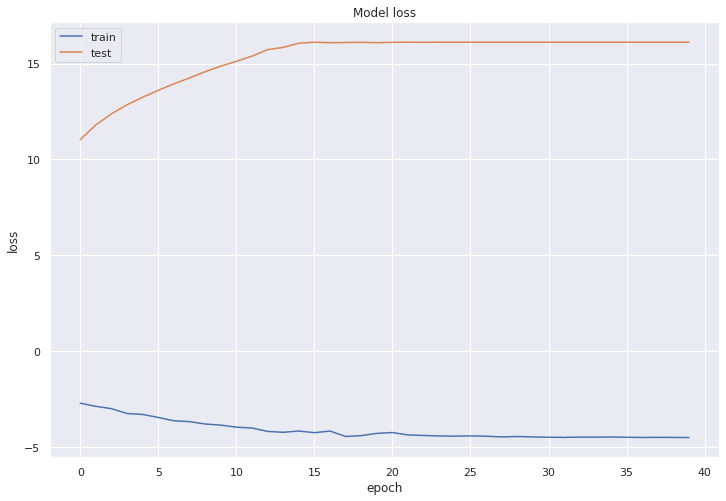


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 1s 8ms/step - loss: -1.2159 - acc: 0.1186 - val_loss: -3.6785 - val_acc: 0.0909

Epoch 00001: val_acc improved from -inf to 0.09091, saving model to best_k_neurons_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 498us/step - loss: -1.2783 - acc: 0.1082 - val_loss: -3.6492 - val_acc: 0.0909

Epoch 00002: val_acc did not improve from 0.09091
Epoch 3/40
194/194 [==============================] - 0s 482us/step - loss: -1.3711 - acc: 0.1031 - val_loss: -3.4624 - val_acc: 0.0909

Epoch 00003: val_acc did not improve from 0.09091
Epoch 4/40
194/194 [==============================] - 0s 547us/step - loss: -1.2011 - acc: 0.0722 - val_loss: -3.6817 - val_acc: 0.0909

Epoch 00004: val_acc did not improve from 0.09091
Epoch 5/40
194/194 [==============================] - 0s 493us/step - loss: -1.4976 - acc: 0.1082 - val_loss: -4.1190 - val_acc: 0.0909

Epoch 00005: val_

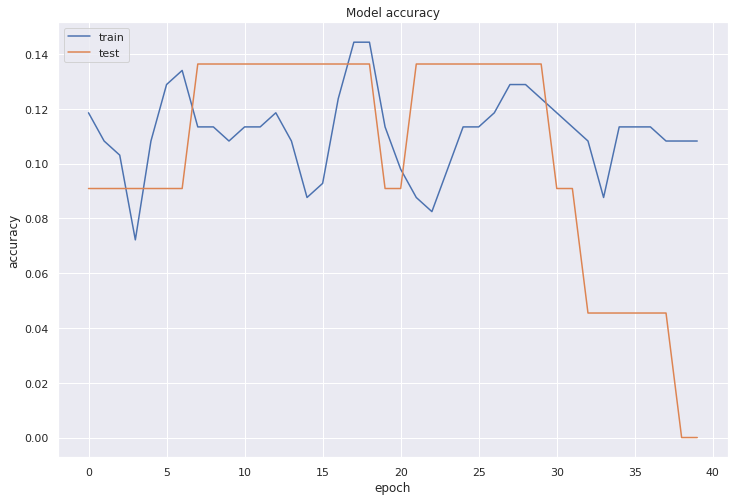

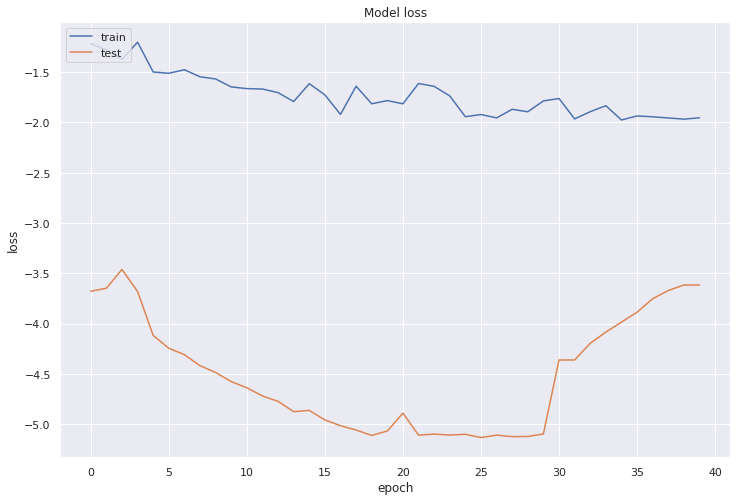


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 8ms/step - loss: -2.7370 - acc: 0.0876 - val_loss: 5.9612 - val_acc: 0.3636

Epoch 00001: val_acc improved from -inf to 0.36364, saving model to best_k_neurons_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 515us/step - loss: -2.8258 - acc: 0.0825 - val_loss: 6.1596 - val_acc: 0.3636

Epoch 00002: val_acc did not improve from 0.36364
Epoch 3/40
194/194 [==============================] - 0s 520us/step - loss: -2.8823 - acc: 0.0773 - val_loss: 6.5001 - val_acc: 0.3636

Epoch 00003: val_acc did not improve from 0.36364
Epoch 4/40
194/194 [==============================] - 0s 495us/step - loss: -3.0014 - acc: 0.0773 - val_loss: 6.4472 - val_acc: 0.3636

Epoch 00004: val_acc did not improve from 0.36364
Epoch 5/40
194/194 [==============================] - 0s 539us/step - loss: -2.9773 - acc: 0.0825 - val_loss: 6.3364 - val_acc: 0.3636

Epoch 00005: val_acc d

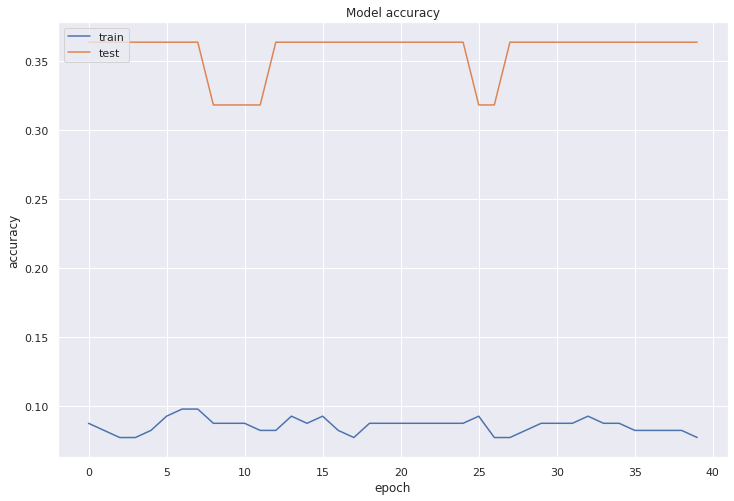

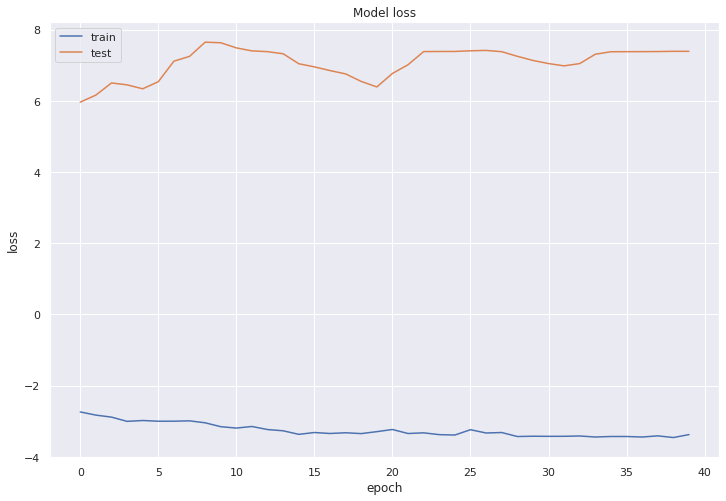


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 8ms/step - loss: -0.5882 - acc: 0.1231 - val_loss: -14.4523 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 487us/step - loss: -0.4787 - acc: 0.0974 - val_loss: -14.6714 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 493us/step - loss: -0.6580 - acc: 0.1128 - val_loss: -14.8697 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 505us/step - loss: -0.6663 - acc: 0.1282 - val_loss: -15.0476 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 497us/step - loss: -0.6727 - acc: 0.1282 - val_loss: -15.1799 - val_acc: 0.00

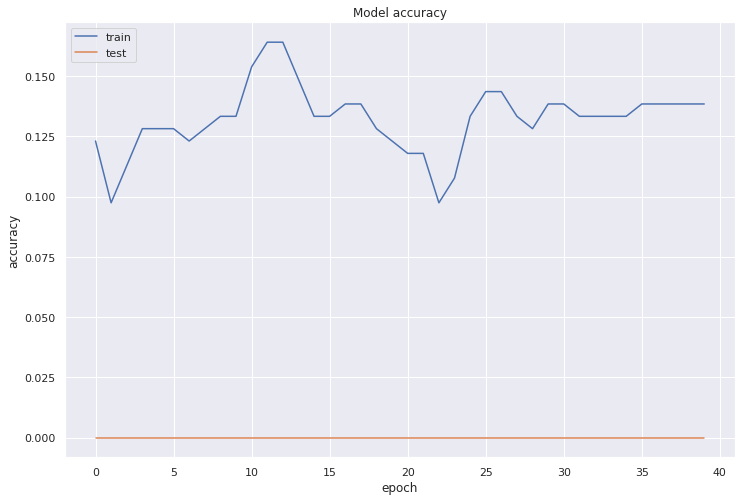

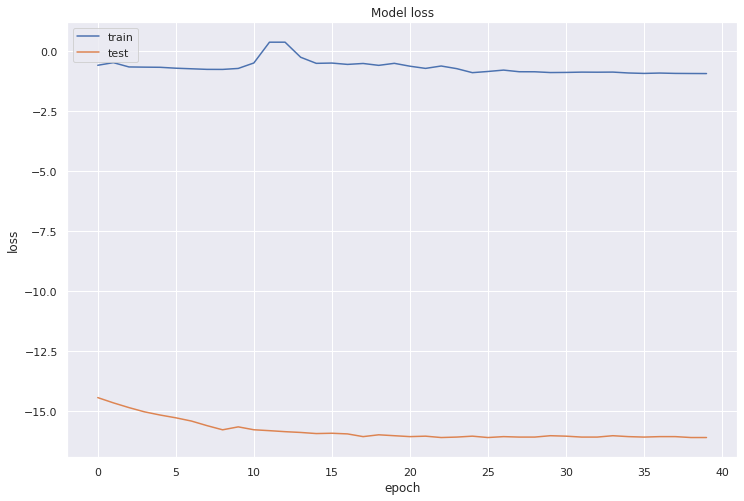


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 8ms/step - loss: -0.4924 - acc: 0.1026 - val_loss: -14.4681 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 511us/step - loss: -0.6834 - acc: 0.1077 - val_loss: -14.0477 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 542us/step - loss: -0.6914 - acc: 0.1333 - val_loss: -13.4436 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 534us/step - loss: -0.8335 - acc: 0.1487 - val_loss: -12.7224 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 520us/step - loss: -0.5410 - acc: 0.1590 - val_loss: -12.7549 - val_acc: 0.00

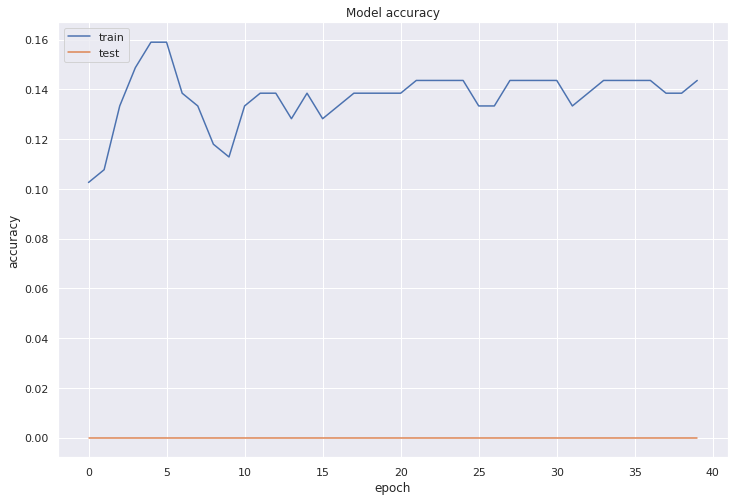

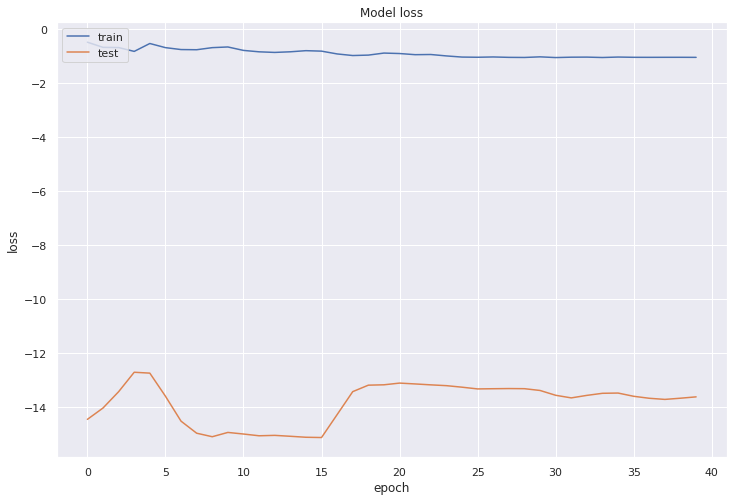


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 8ms/step - loss: -3.4675 - acc: 0.1128 - val_loss: 12.0794 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 505us/step - loss: -3.5333 - acc: 0.1282 - val_loss: 12.7502 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 504us/step - loss: -3.6739 - acc: 0.1333 - val_loss: 13.1048 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 508us/step - loss: -3.7286 - acc: 0.1385 - val_loss: 13.3814 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 554us/step - loss: -3.7998 - acc: 0.1385 - val_loss: 13.1960 - val_acc: 0.0000e+0

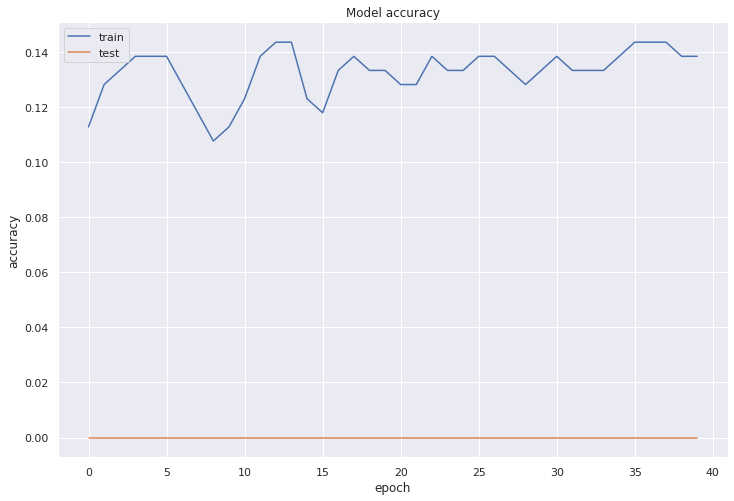

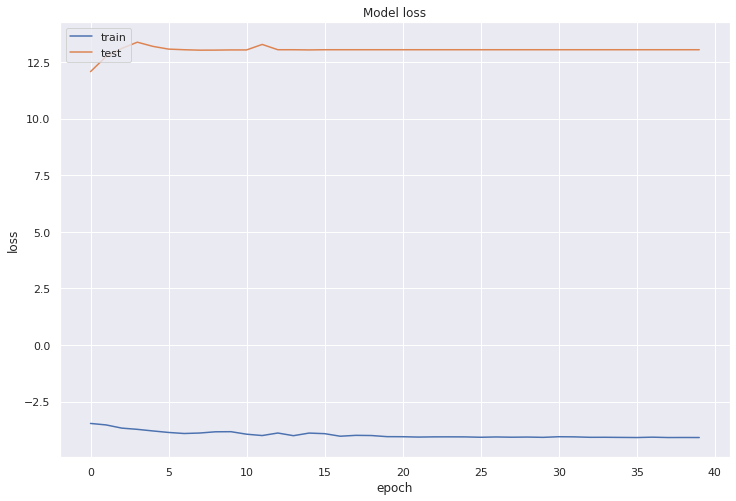


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 9ms/step - loss: -1.9559 - acc: 0.1333 - val_loss: -2.7070 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 546us/step - loss: -1.8902 - acc: 0.1333 - val_loss: -2.6767 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 493us/step - loss: -2.0634 - acc: 0.1436 - val_loss: -2.6663 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 492us/step - loss: -2.1117 - acc: 0.1487 - val_loss: -2.7994 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 510us/step - loss: -2.1930 - acc: 0.1385 - val_loss: -2.7892 - val_acc: 0.0000e+

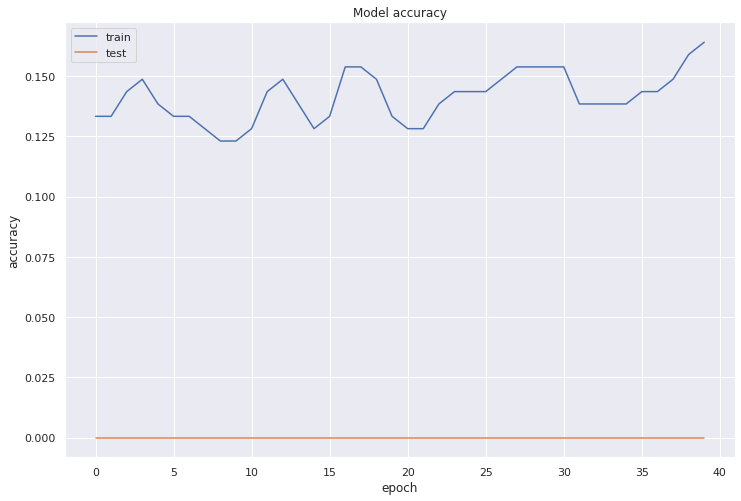

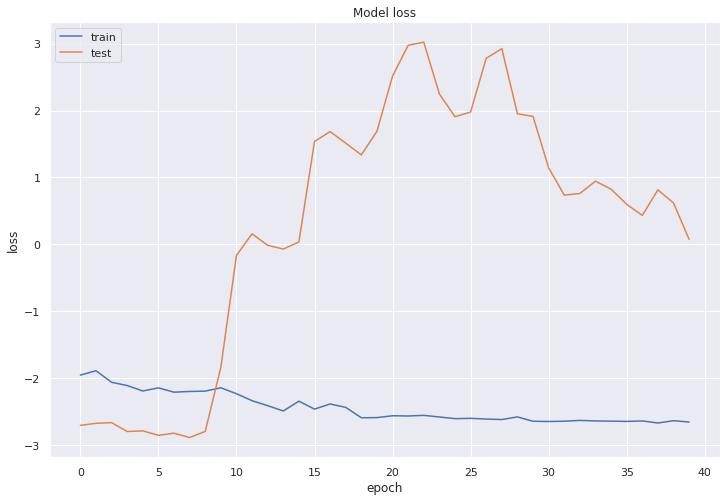

10.45% (+/- 15.08%)


In [32]:
_lstm_k_neurons_model = lstm_model(n_neurons = 100)
cvscores_neurons_model = k_Fold(_lstm_k_neurons_model, 'best_k_neurons_model')

#### Accuracy Score Plot in K-Fold Cross Validation for neurons model

max:  0.40909090638160706
mean:  0.10454545617103576
std:  0.1589826487128002


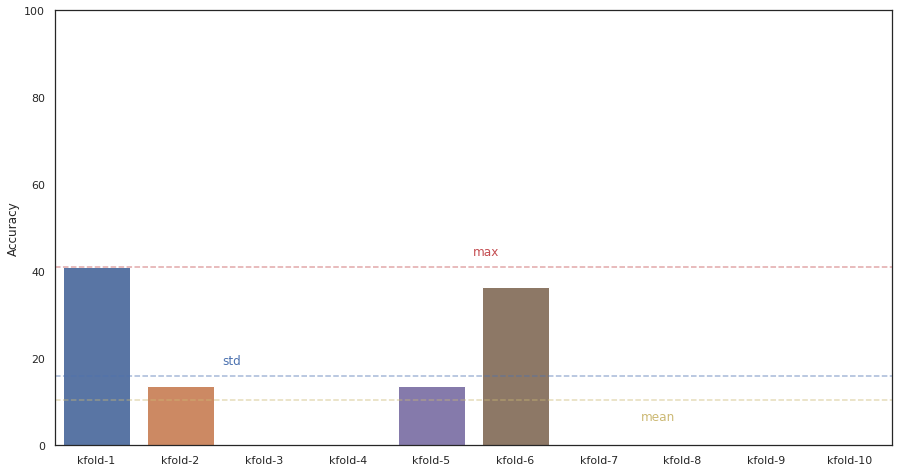

In [33]:
plot_bar_KFold_score(cvscores_neurons_model)

### 4.3 Adjusting the weights of the network(batch size)

The **LSTM** network updates its weights based on the **batch size** **hyperparameter**. A good tactic is to specify the size of the batch in accordance with size of the training dataset and test set. For this tuning, we will observe how the accuracy of the base model is affected by **decreasing** the size of each update on the weights the **LSTM** performs.



#### Deploying the base model structure with adjustment to the size of batch in LSTM

In [34]:
_lstm_batch_size_model = lstm_model()
chk = ModelCheckpoint('best_model_batch_size.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
lstm_batch_size_m_history = _lstm_batch_size_model.fit(train, train_target, epochs=200, batch_size=200, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_batch_size_model = load_model('best_model_batch_size.pkl')
test_preds = _lstm_batch_size_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 9s 67ms/step - loss: 0.6894 - acc: 0.6103 - val_loss: 0.7001 - val_acc: 0.4118

Epoch 00001: val_acc improved from -inf to 0.41176, saving model to best_model_batch_size.pkl
Epoch 2/200
136/136 [==============================] - 0s 415us/step - loss: 0.6801 - acc: 0.7206 - val_loss: 0.7090 - val_acc: 0.3235

Epoch 00002: val_acc did not improve from 0.41176
Epoch 3/200
136/136 [==============================] - 0s 433us/step - loss: 0.6686 - acc: 0.7721 - val_loss: 0.7198 - val_acc: 0.2941

Epoch 00003: val_acc did not improve from 0.41176
Epoch 4/200
136/136 [==============================] - 0s 408us/step - loss: 0.6546 - acc: 0.7794 - val_loss: 0.7330 - val_acc: 0.2647

Epoch 00004: val_acc did not improve from 0.41176
Epoch 5/200
136/136 [==============================] - 0s 432us/step - loss: 0.6364 - acc: 0.7794 - val_loss: 0.7507 - val_acc: 0.2353

Epoch 00005: val_acc did not imp

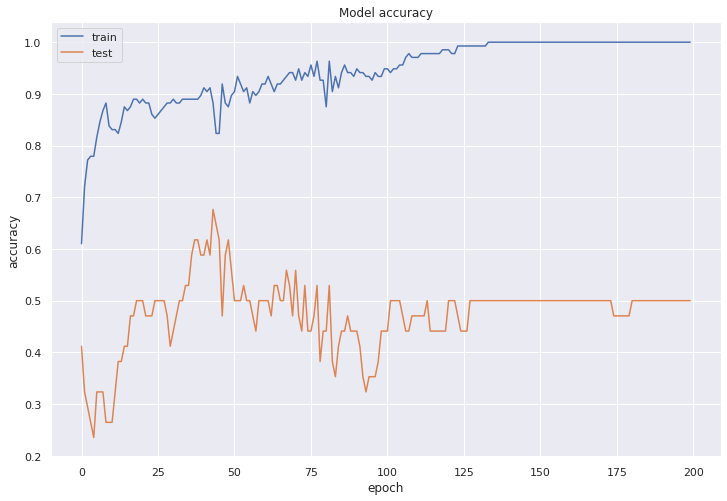

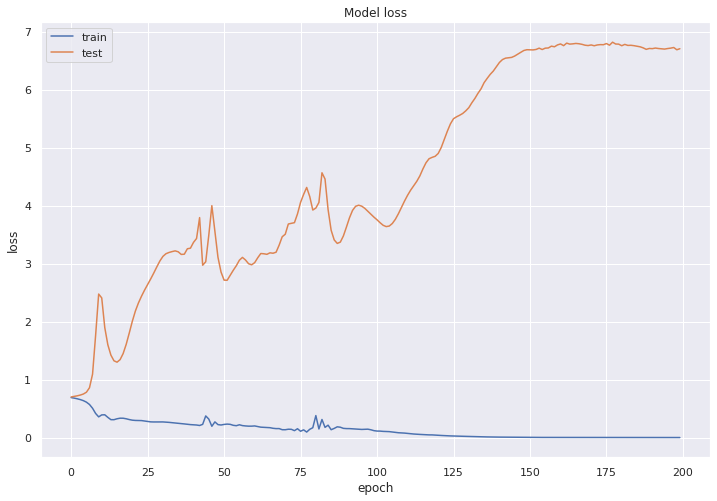

In [35]:
plot_histogram_of_performance(lstm_batch_size_m_history)

###10 Fold Validation 



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 9s 49ms/step - loss: 0.7079 - acc: 0.2113 - val_loss: 0.6734 - val_acc: 0.5909

Epoch 00001: val_acc improved from -inf to 0.59091, saving model to best_k_batch_size_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 307us/step - loss: 0.6669 - acc: 0.0876 - val_loss: 0.6839 - val_acc: 0.4545

Epoch 00002: val_acc did not improve from 0.59091
Epoch 3/40
194/194 [==============================] - 0s 315us/step - loss: 0.6202 - acc: 0.0515 - val_loss: 0.6976 - val_acc: 0.4091

Epoch 00003: val_acc did not improve from 0.59091
Epoch 4/40
194/194 [==============================] - 0s 286us/step - loss: 0.5668 - acc: 0.0515 - val_loss: 0.7169 - val_acc: 0.3182

Epoch 00004: val_acc did not improve from 0.59091
Epoch 5/40
194/194 [==============================] - 0s 321us/step - loss: 0.5003 - acc: 0.0412 - val_loss: 0.7472 - val_acc: 0.3182

Epoch 00005: val_acc di

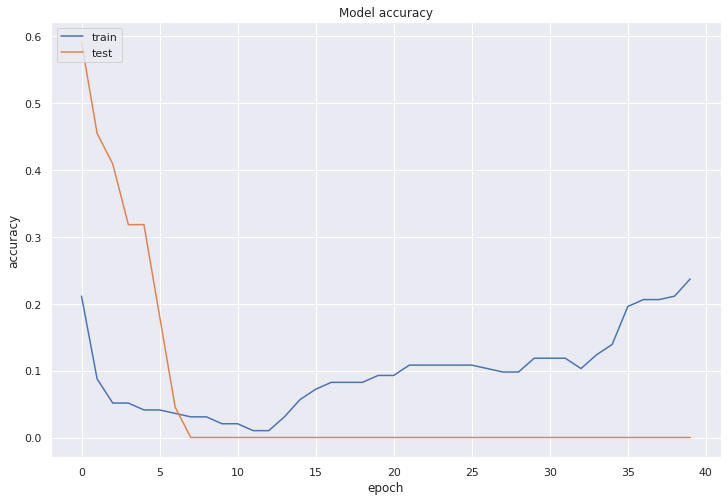

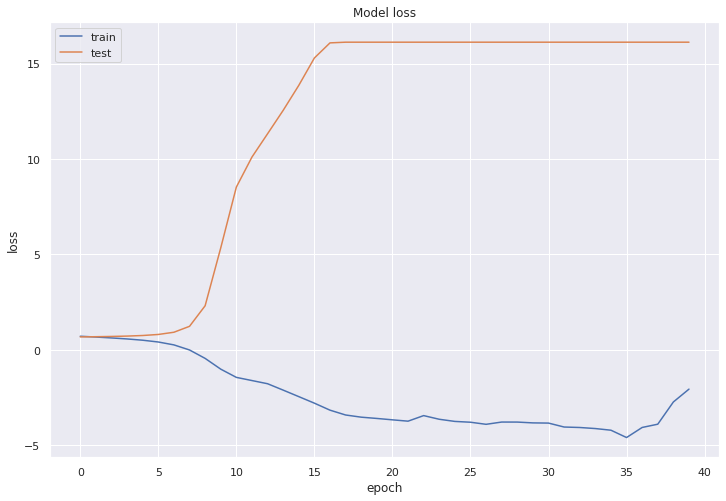


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 9ms/step - loss: 0.6630 - acc: 0.1495 - val_loss: 0.6332 - val_acc: 0.0455

Epoch 00001: val_acc improved from -inf to 0.04545, saving model to best_k_batch_size_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 279us/step - loss: 0.6216 - acc: 0.1134 - val_loss: 0.5676 - val_acc: 0.0455

Epoch 00002: val_acc did not improve from 0.04545
Epoch 3/40
194/194 [==============================] - 0s 336us/step - loss: 0.5756 - acc: 0.1134 - val_loss: 0.4990 - val_acc: 0.0455

Epoch 00003: val_acc did not improve from 0.04545
Epoch 4/40
194/194 [==============================] - 0s 293us/step - loss: 0.5181 - acc: 0.1134 - val_loss: 0.4144 - val_acc: 0.0455

Epoch 00004: val_acc did not improve from 0.04545
Epoch 5/40
194/194 [==============================] - 0s 284us/step - loss: 0.4378 - acc: 0.1186 - val_loss: 0.2894 - val_acc: 0.0455

Epoch 00005: val_acc did

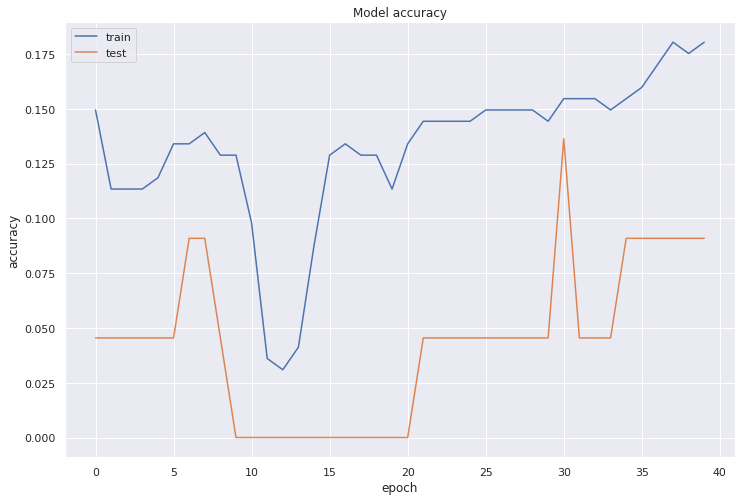

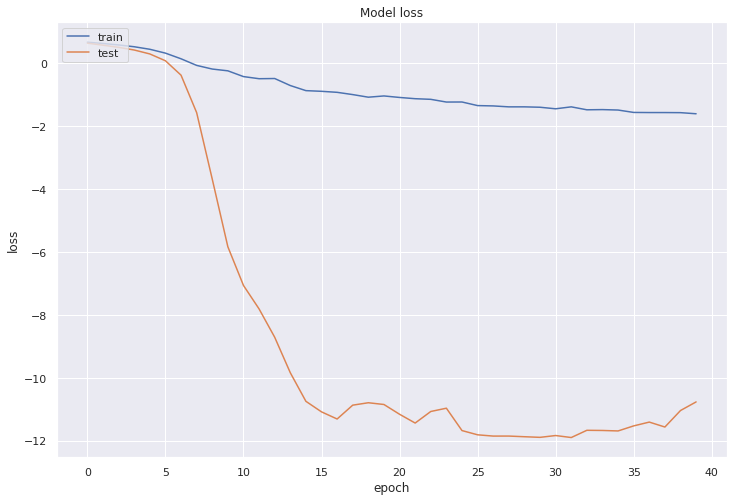


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 9ms/step - loss: -1.0722 - acc: 0.1701 - val_loss: -14.6528 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 284us/step - loss: -1.1702 - acc: 0.1598 - val_loss: -14.6528 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 355us/step - loss: -1.1440 - acc: 0.1495 - val_loss: -14.6528 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 277us/step - loss: -1.1931 - acc: 0.1649 - val_loss: -14.6528 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 293us/step - loss: -1.2192 - acc: 0.1701 - val_loss: -14.6528 - val_acc: 0

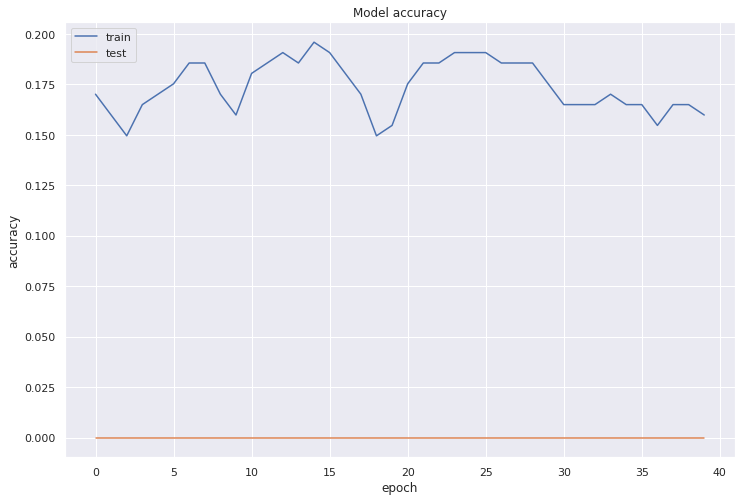

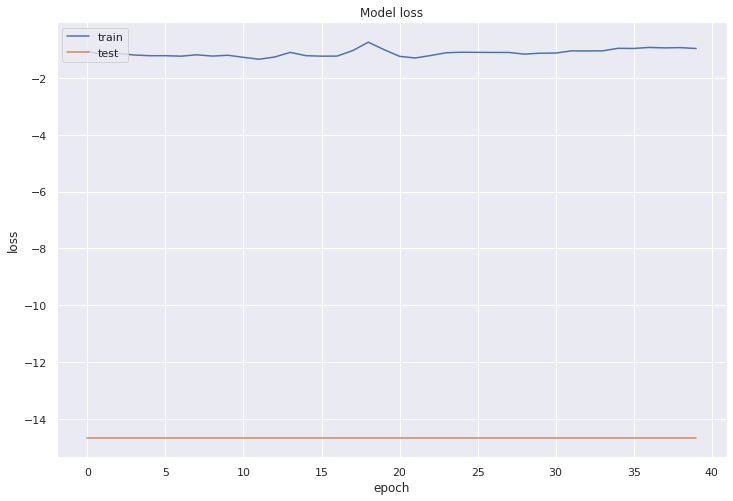


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 9ms/step - loss: -4.6597 - acc: 0.1598 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 290us/step - loss: -4.6335 - acc: 0.1495 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 341us/step - loss: -4.6826 - acc: 0.1649 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 291us/step - loss: -4.7087 - acc: 0.1701 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 314us/step - loss: -4.7079 - acc: 0.1753 - val_loss: 16.1181 - val_acc: 0.0000

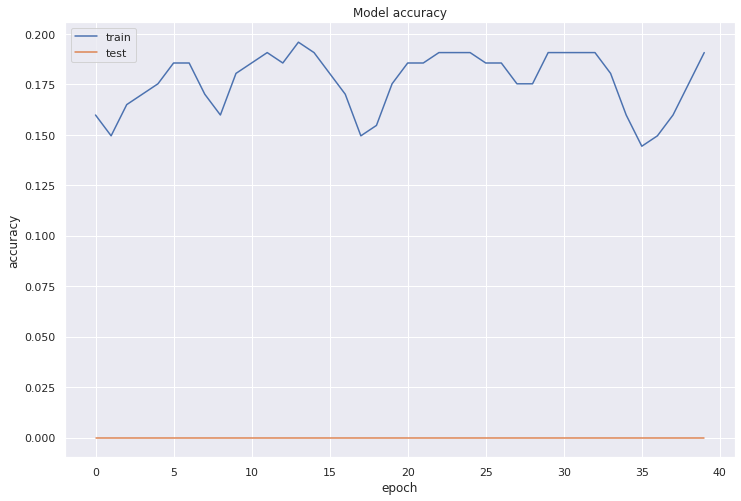

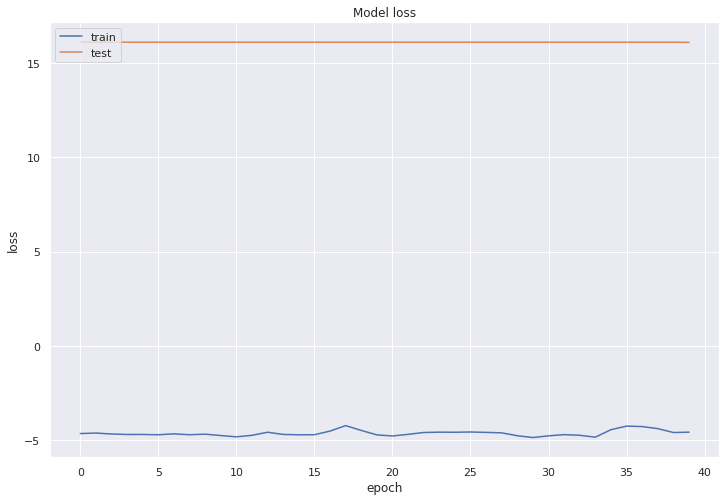


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 10ms/step - loss: -2.0710 - acc: 0.1340 - val_loss: -6.5102 - val_acc: 0.1818

Epoch 00001: val_acc improved from -inf to 0.18182, saving model to best_k_batch_size_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 313us/step - loss: -2.1130 - acc: 0.1392 - val_loss: -6.5337 - val_acc: 0.2273

Epoch 00002: val_acc improved from 0.18182 to 0.22727, saving model to best_k_batch_size_model.pkl
Epoch 3/40
194/194 [==============================] - 0s 287us/step - loss: -2.1409 - acc: 0.1392 - val_loss: -6.5455 - val_acc: 0.2273

Epoch 00003: val_acc did not improve from 0.22727
Epoch 4/40
194/194 [==============================] - 0s 313us/step - loss: -2.1436 - acc: 0.1495 - val_loss: -6.5518 - val_acc: 0.2273

Epoch 00004: val_acc did not improve from 0.22727
Epoch 5/40
194/194 [==============================] - 0s 277us/step - loss: -2.1780 - acc: 0.1546 - v

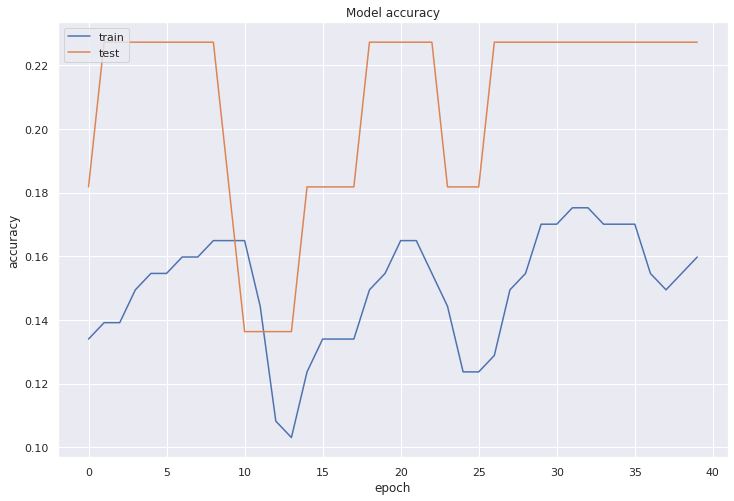

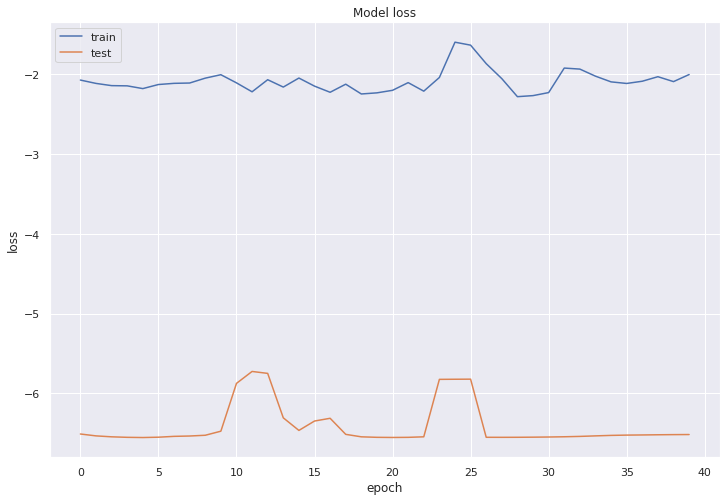


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 10ms/step - loss: -3.2402 - acc: 0.0979 - val_loss: 3.0970 - val_acc: 0.5909

Epoch 00001: val_acc improved from -inf to 0.59091, saving model to best_k_batch_size_model.pkl
Epoch 2/40
194/194 [==============================] - 0s 302us/step - loss: -3.2416 - acc: 0.1082 - val_loss: 3.0773 - val_acc: 0.5909

Epoch 00002: val_acc did not improve from 0.59091
Epoch 3/40
194/194 [==============================] - 0s 297us/step - loss: -3.2706 - acc: 0.1134 - val_loss: 3.0683 - val_acc: 0.5909

Epoch 00003: val_acc did not improve from 0.59091
Epoch 4/40
194/194 [==============================] - 0s 284us/step - loss: -3.2339 - acc: 0.1134 - val_loss: 3.0683 - val_acc: 0.5909

Epoch 00004: val_acc did not improve from 0.59091
Epoch 5/40
194/194 [==============================] - 0s 341us/step - loss: -3.2128 - acc: 0.1134 - val_loss: 3.1338 - val_acc: 0.5909

Epoch 00005: val_a

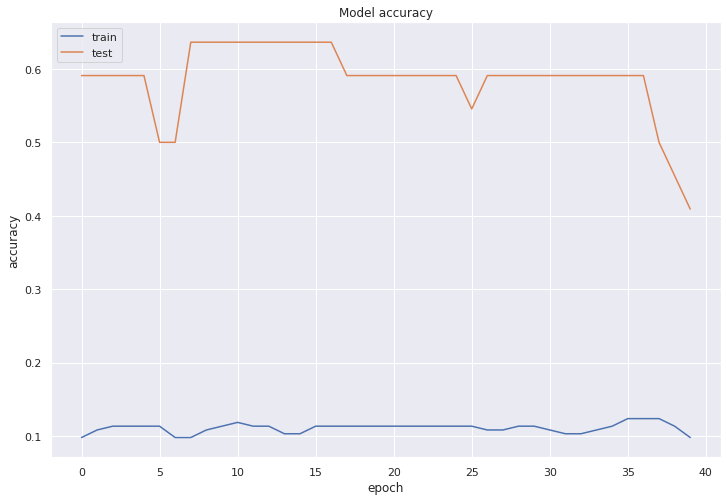

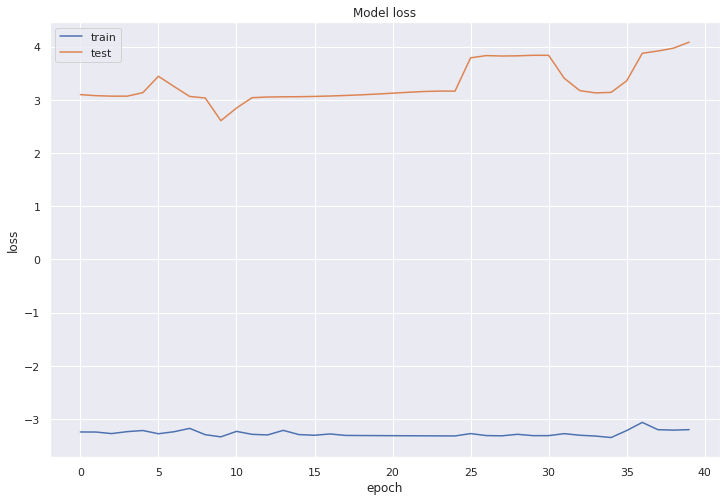


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 10ms/step - loss: -1.1930 - acc: 0.1795 - val_loss: -16.1181 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 296us/step - loss: -1.2362 - acc: 0.1846 - val_loss: -16.1181 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 290us/step - loss: -1.1725 - acc: 0.1897 - val_loss: -16.1181 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 272us/step - loss: -1.1767 - acc: 0.1846 - val_loss: -16.1181 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 284us/step - loss: -1.2668 - acc: 0.1846 - val_loss: -16.1181 - val_acc: 

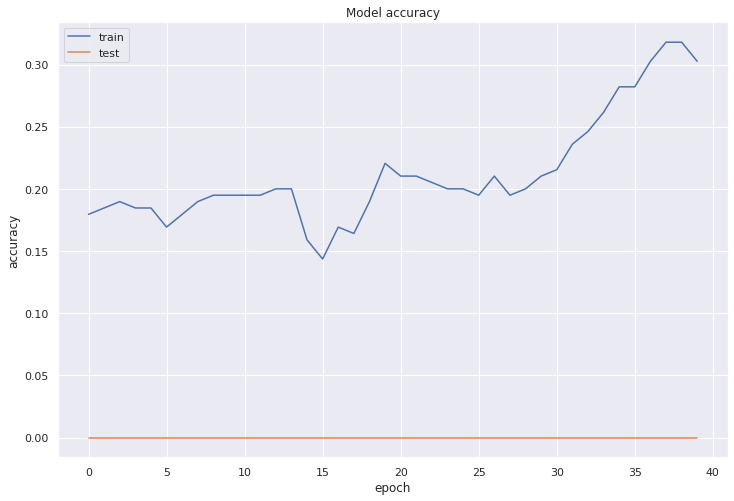

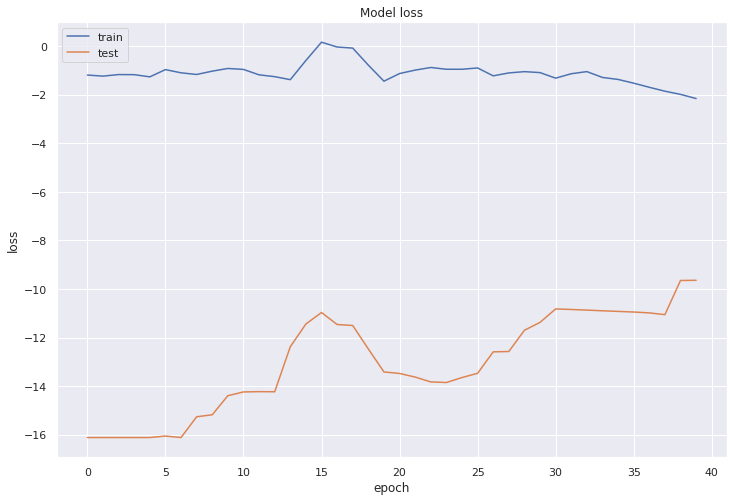


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 10ms/step - loss: -1.5410 - acc: 0.1846 - val_loss: -12.4204 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 287us/step - loss: -1.5682 - acc: 0.1897 - val_loss: -10.7445 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 292us/step - loss: -1.5103 - acc: 0.1949 - val_loss: -10.2418 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 301us/step - loss: -1.5968 - acc: 0.1949 - val_loss: -9.1267 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 282us/step - loss: -1.5879 - acc: 0.1897 - val_loss: -8.8844 - val_acc: 0.

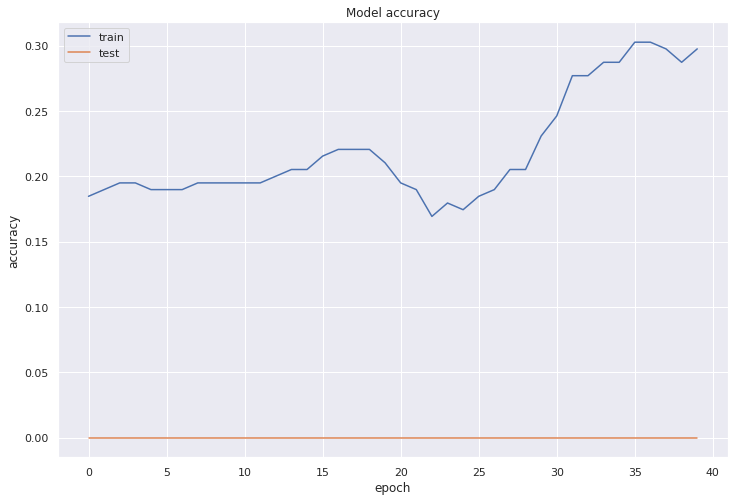

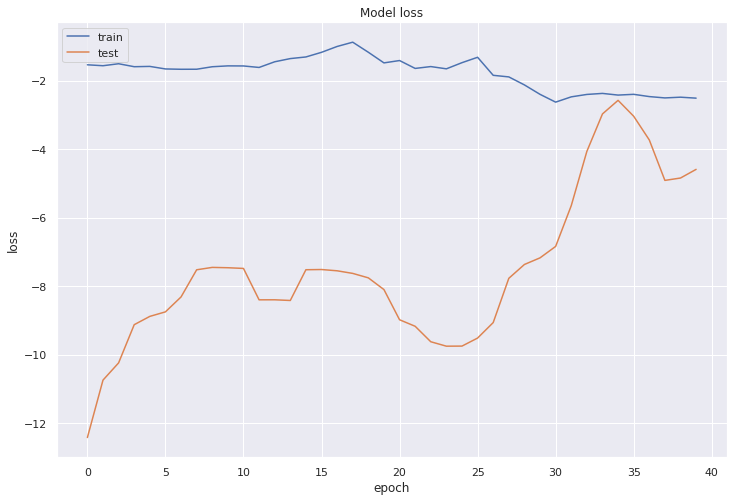


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 10ms/step - loss: -4.5131 - acc: 0.1897 - val_loss: 14.9279 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 286us/step - loss: -4.5154 - acc: 0.1846 - val_loss: 14.9224 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 284us/step - loss: -4.6106 - acc: 0.1846 - val_loss: 14.9224 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 270us/step - loss: -4.3125 - acc: 0.1692 - val_loss: 14.9347 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 290us/step - loss: -4.5232 - acc: 0.1897 - val_loss: 14.9373 - val_acc: 0.000

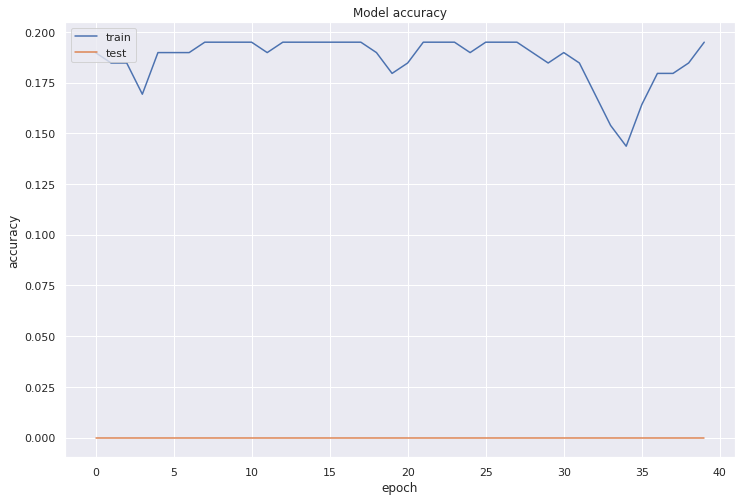

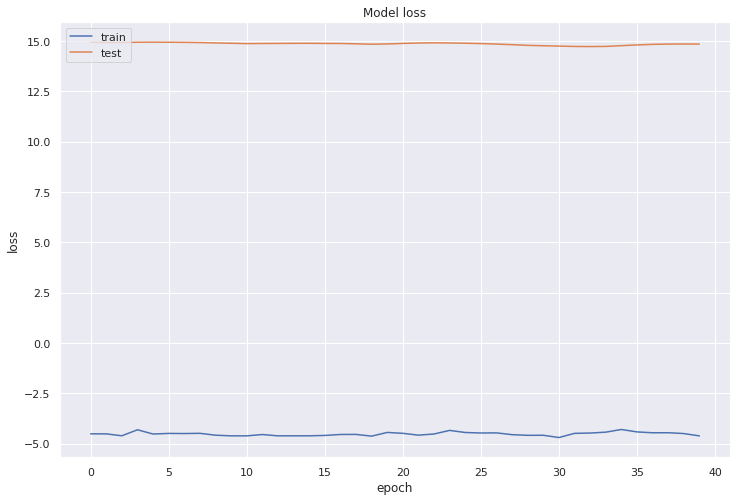


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 10ms/step - loss: -2.4945 - acc: 0.1846 - val_loss: -3.8376 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/40
195/195 [==============================] - 0s 281us/step - loss: -2.5899 - acc: 0.1846 - val_loss: -3.8653 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 301us/step - loss: -2.2958 - acc: 0.1692 - val_loss: -3.8376 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 272us/step - loss: -2.5915 - acc: 0.1897 - val_loss: -3.8376 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 277us/step - loss: -2.5701 - acc: 0.1897 - val_loss: -3.8376 - val_acc: 0.00

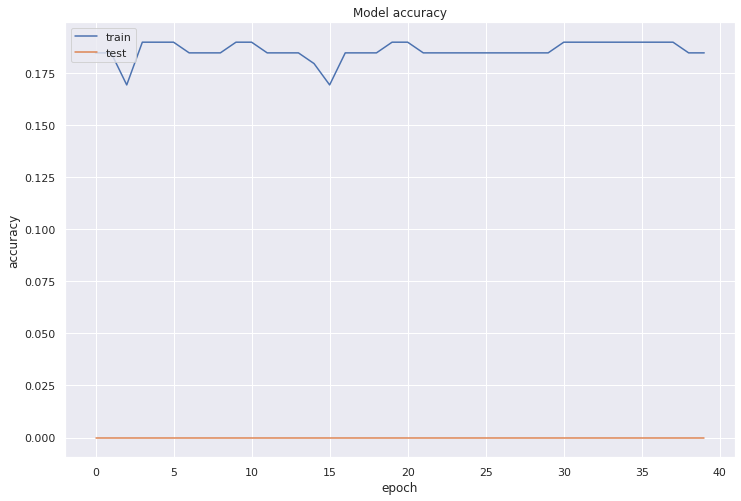

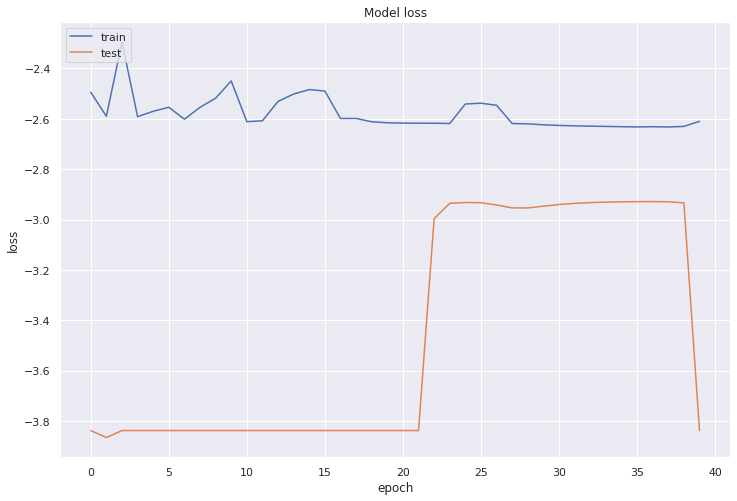

15.91% (+/- 23.90%)


In [36]:
_lstm_k_batch_size_model = lstm_model()
cvscores_batch_size_model = k_Fold(_lstm_k_batch_size_model, 'best_k_batch_size_model', _batch_size=200)

#### Accuracy Score Plot in K-Fold Cross Validation for batch size model

max:  0.6363636255264282
mean:  0.15909090638160706
std:  0.2519437676967959


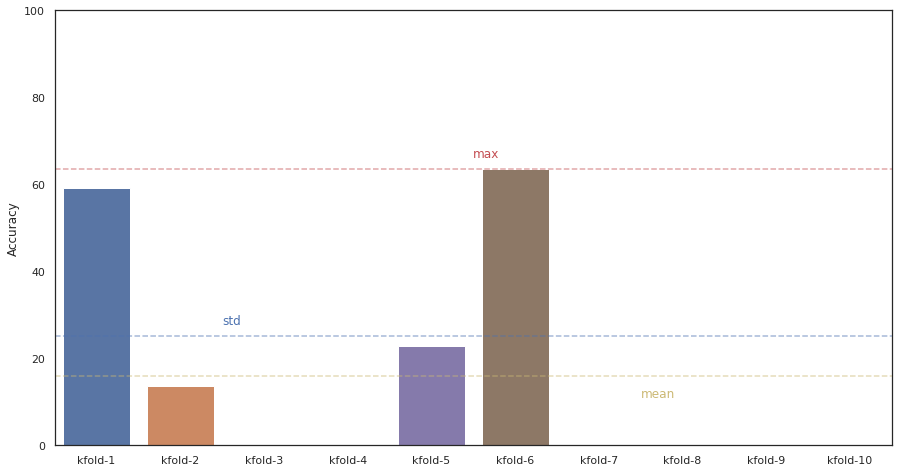

In [37]:
plot_bar_KFold_score(cvscores_batch_size_model)

### 4.4 Adjusting the loss function of the LSTM model

The loss function is an indicator of evaluating how well the LSTM modeled the data. We are attempting to model the dataset with different loss function this time. The loss function we use is called **Mean Squared Error**. This function attepmts to penalise large errors and outcomes in a score that is in the same units as the data.

In [38]:
_lstm_loss_f_model = lstm_model(loss_f='mean_squared_error')
chk = ModelCheckpoint('best_model_loss_f.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
lstm_loss_f_m_history = _lstm_loss_f_model.fit(train, train_target, epochs=200, batch_size=200, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_loss_f_model = load_model('best_model_loss_f.pkl')
test_preds = _lstm_loss_f_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 11s 84ms/step - loss: 0.6980 - acc: 0.4559 - val_loss: 0.7190 - val_acc: 0.1471

Epoch 00001: val_acc improved from -inf to 0.14706, saving model to best_model_loss_f.pkl
Epoch 2/200
136/136 [==============================] - 0s 397us/step - loss: 0.6845 - acc: 0.6324 - val_loss: 0.7168 - val_acc: 0.1765

Epoch 00002: val_acc improved from 0.14706 to 0.17647, saving model to best_model_loss_f.pkl
Epoch 3/200
136/136 [==============================] - 0s 402us/step - loss: 0.6714 - acc: 0.6838 - val_loss: 0.7157 - val_acc: 0.2353

Epoch 00003: val_acc improved from 0.17647 to 0.23529, saving model to best_model_loss_f.pkl
Epoch 4/200
136/136 [==============================] - 0s 414us/step - loss: 0.6569 - acc: 0.7574 - val_loss: 0.7163 - val_acc: 0.2941

Epoch 00004: val_acc improved from 0.23529 to 0.29412, saving model to best_model_loss_f.pkl
Epoch 5/200
136/136 [=====================

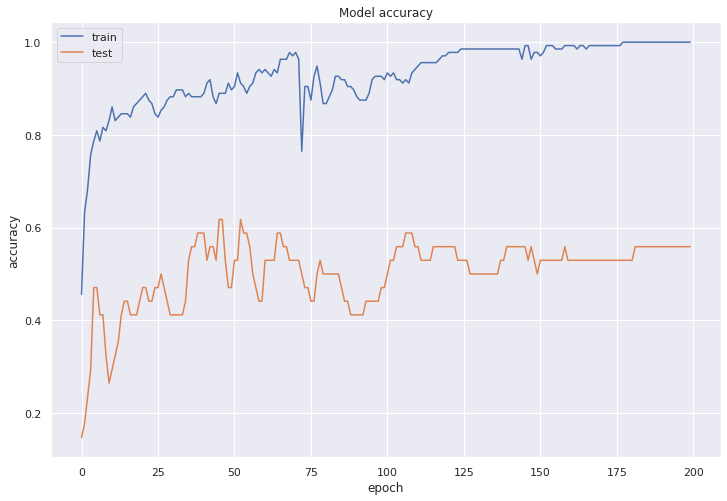

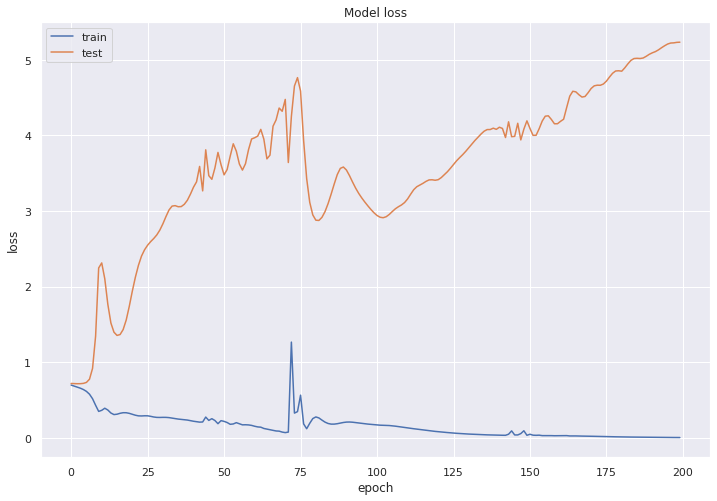

In [40]:
plot_histogram_of_performance(lstm_loss_f_m_history)

## 10 Fold Validation



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 13s 67ms/step - loss: 0.6815 - acc: 0.2268 - val_loss: 0.7523 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/40
194/194 [==============================] - 0s 538us/step - loss: 0.5690 - acc: 0.0155 - val_loss: 0.8104 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 501us/step - loss: 0.3872 - acc: 0.0258 - val_loss: 1.0142 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 515us/step - loss: -0.0800 - acc: 0.0155 - val_loss: 2.7849 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 506us/step - loss: -1.0445 - acc: 0.0103 - val_loss: 8.7578 - val_acc: 0.0000e+00

Epoch 

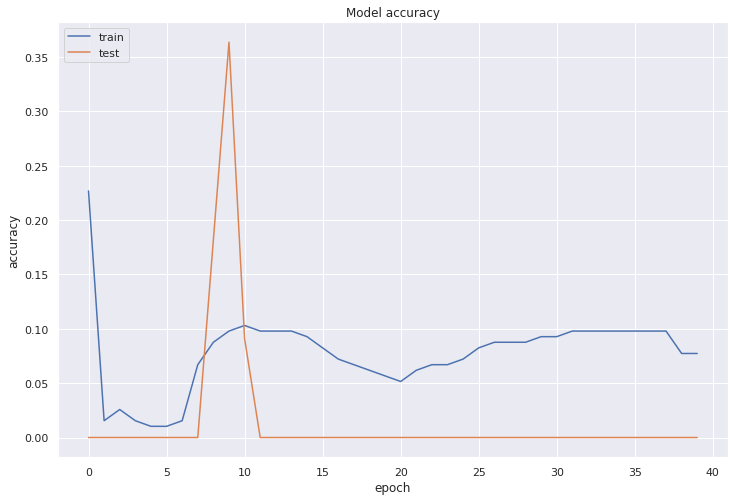

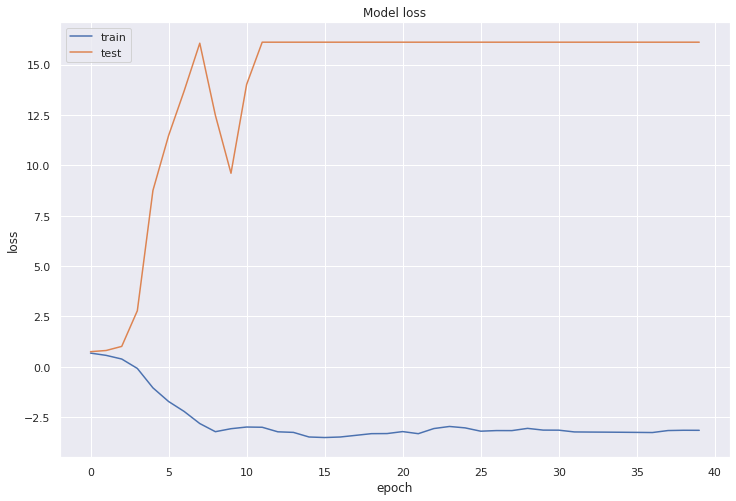


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 12ms/step - loss: -0.6859 - acc: 0.1443 - val_loss: -11.1743 - val_acc: 0.0909

Epoch 00001: val_acc improved from -inf to 0.09091, saving model to best_model_loss_f.pkl
Epoch 2/40
194/194 [==============================] - 0s 526us/step - loss: -0.8480 - acc: 0.1959 - val_loss: -4.4092 - val_acc: 0.1364

Epoch 00002: val_acc improved from 0.09091 to 0.13636, saving model to best_model_loss_f.pkl
Epoch 3/40
194/194 [==============================] - 0s 485us/step - loss: -0.1202 - acc: 0.2113 - val_loss: -1.8913 - val_acc: 0.1818

Epoch 00003: val_acc improved from 0.13636 to 0.18182, saving model to best_model_loss_f.pkl
Epoch 4/40
194/194 [==============================] - 0s 504us/step - loss: -0.1440 - acc: 0.2113 - val_loss: -0.8133 - val_acc: 0.1818

Epoch 00004: val_acc did not improve from 0.18182
Epoch 5/40
194/194 [==============================] - 0s 529us/step -

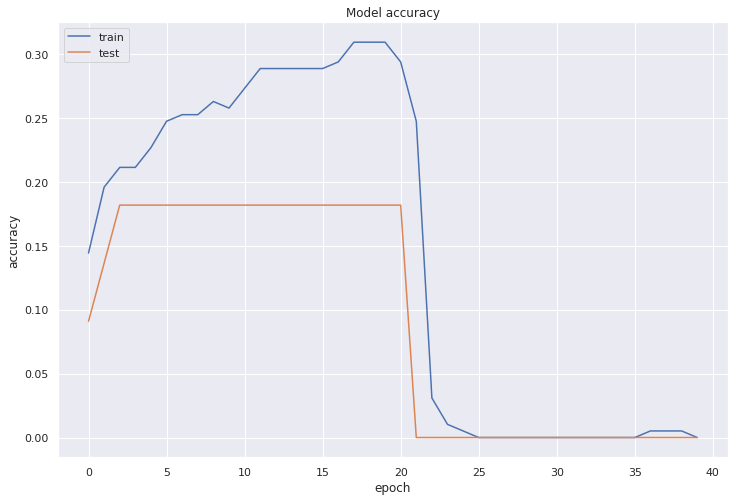

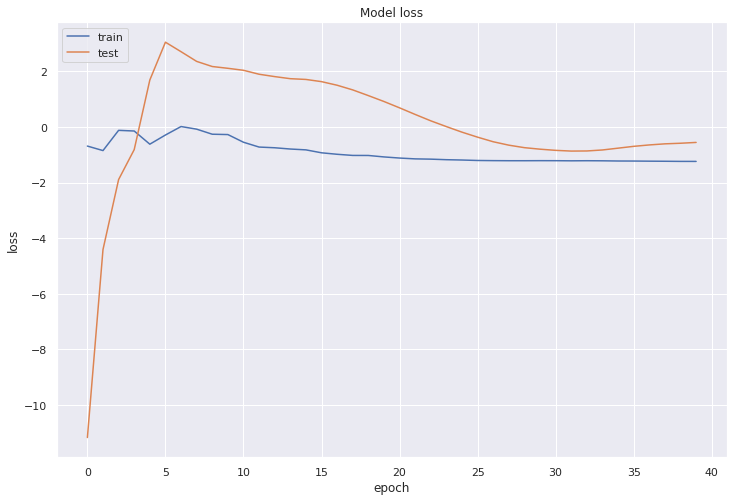


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 12ms/step - loss: 1.2170 - acc: 0.2320 - val_loss: -13.6764 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/40
194/194 [==============================] - 0s 551us/step - loss: 1.1590 - acc: 0.2423 - val_loss: -12.1031 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 523us/step - loss: 1.2193 - acc: 0.2680 - val_loss: -9.7383 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 572us/step - loss: 1.1511 - acc: 0.2680 - val_loss: -8.0923 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 511us/step - loss: 1.0010 - acc: 0.2732 - val_loss: -8.2841 - val_acc: 0.0000e+00

Ep

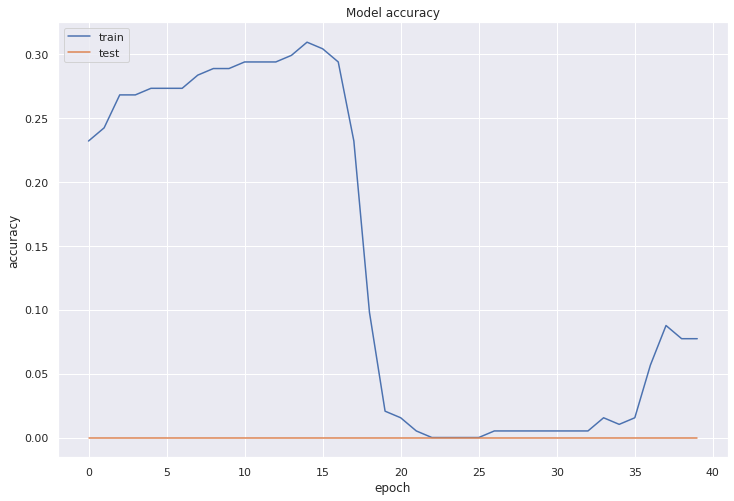

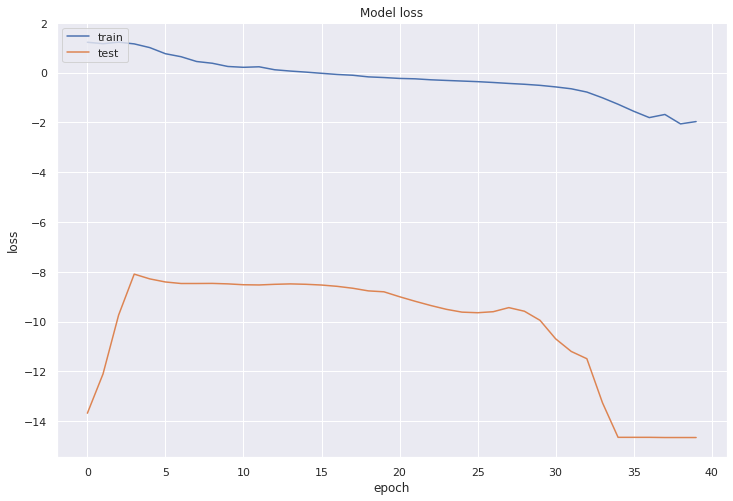


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 12ms/step - loss: -2.2259 - acc: 0.2474 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/40
194/194 [==============================] - 0s 584us/step - loss: -1.9682 - acc: 0.2629 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
194/194 [==============================] - 0s 567us/step - loss: -1.6016 - acc: 0.2629 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
194/194 [==============================] - 0s 522us/step - loss: -1.8049 - acc: 0.2732 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
194/194 [==============================] - 0s 492us/step - loss: -2.0602 - acc: 0.2680 - val_loss: 16.1181 - val_acc: 0.0000e+00


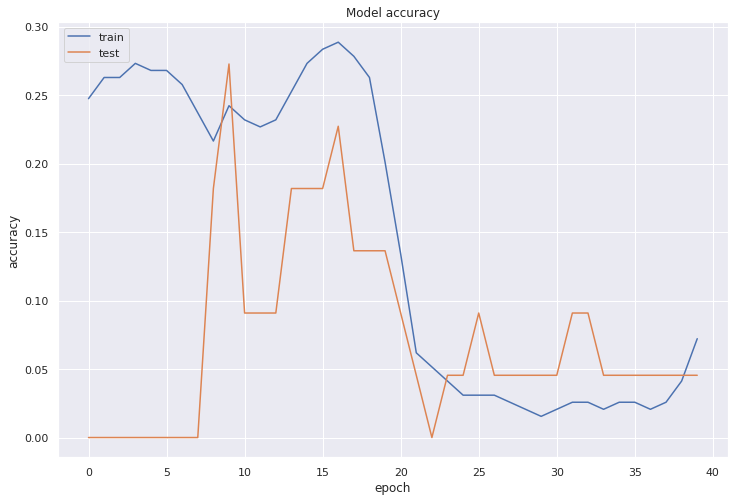

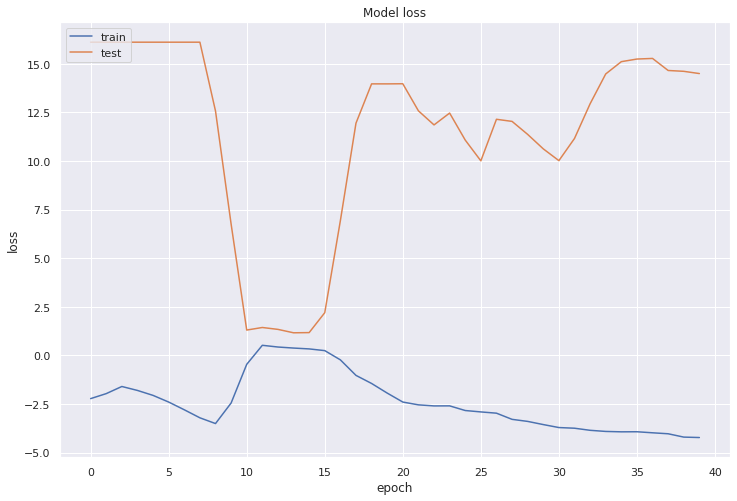


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 12ms/step - loss: 0.4528 - acc: 0.2423 - val_loss: -0.9747 - val_acc: 0.1364

Epoch 00001: val_acc improved from -inf to 0.13636, saving model to best_model_loss_f.pkl
Epoch 2/40
194/194 [==============================] - 0s 538us/step - loss: 0.7351 - acc: 0.2268 - val_loss: -0.7608 - val_acc: 0.1364

Epoch 00002: val_acc did not improve from 0.13636
Epoch 3/40
194/194 [==============================] - 0s 494us/step - loss: 0.6483 - acc: 0.2320 - val_loss: 0.0623 - val_acc: 0.1818

Epoch 00003: val_acc improved from 0.13636 to 0.18182, saving model to best_model_loss_f.pkl
Epoch 4/40
194/194 [==============================] - 0s 491us/step - loss: 0.6217 - acc: 0.2990 - val_loss: 0.6676 - val_acc: 0.1818

Epoch 00004: val_acc did not improve from 0.18182
Epoch 5/40
194/194 [==============================] - 0s 501us/step - loss: 0.6084 - acc: 0.3247 - val_loss: 0.9587 - v

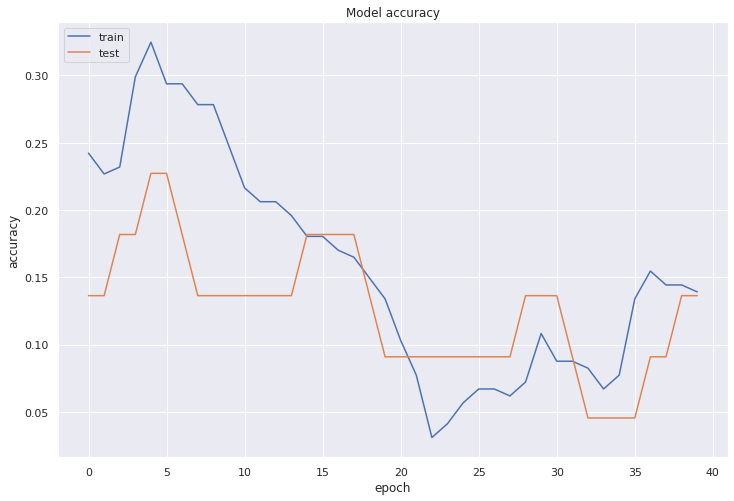

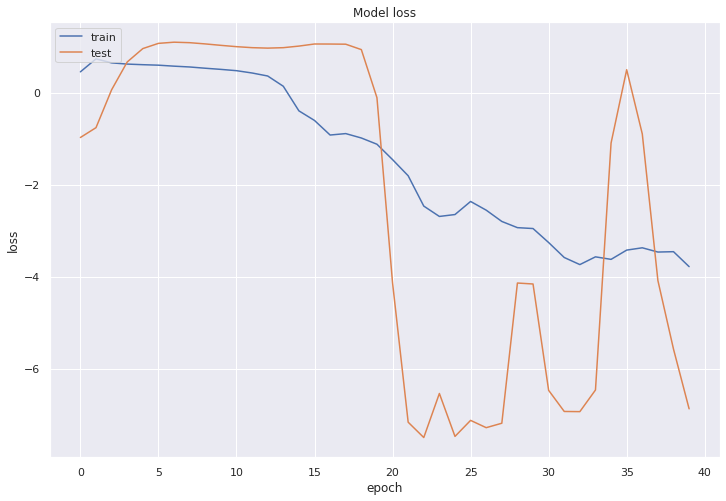


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/40
194/194 [==============================] - 2s 13ms/step - loss: 0.6315 - acc: 0.2577 - val_loss: 0.7305 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to best_model_loss_f.pkl
Epoch 2/40
194/194 [==============================] - 0s 587us/step - loss: 0.6129 - acc: 0.2629 - val_loss: 0.7405 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/40
194/194 [==============================] - 0s 501us/step - loss: 0.5913 - acc: 0.2474 - val_loss: 0.7469 - val_acc: 0.4545

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/40
194/194 [==============================] - 0s 487us/step - loss: 0.5646 - acc: 0.2371 - val_loss: 0.7511 - val_acc: 0.4091

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/40
194/194 [==============================] - 0s 512us/step - loss: 0.5340 - acc: 0.2268 - val_loss: 0.7539 - val_acc: 0.2727

Epoch 00005: val_acc did not 

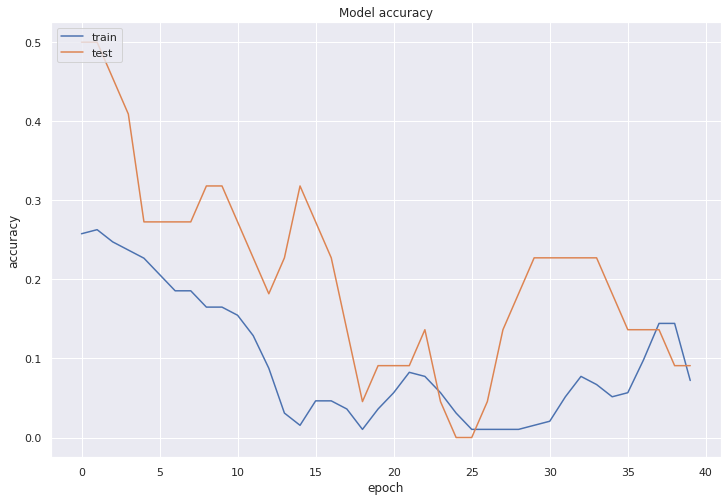

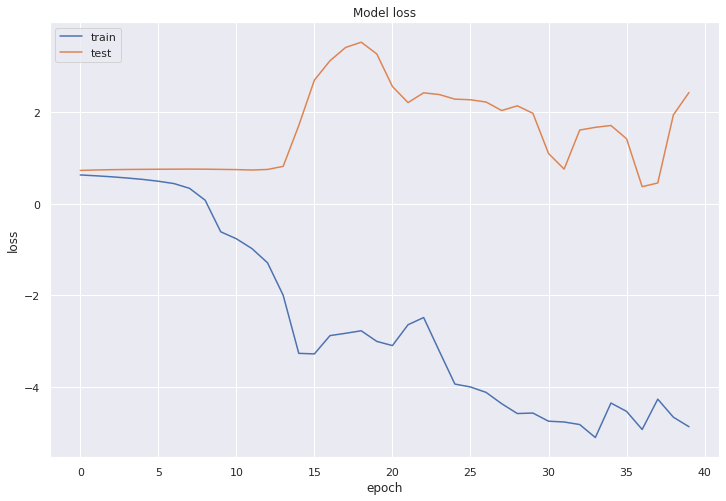


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 13ms/step - loss: 0.5997 - acc: 0.3179 - val_loss: 0.8626 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/40
195/195 [==============================] - 0s 527us/step - loss: 0.5805 - acc: 0.3026 - val_loss: 0.8607 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 514us/step - loss: 0.5566 - acc: 0.2974 - val_loss: 0.8541 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 522us/step - loss: 0.5284 - acc: 0.2769 - val_loss: 0.8444 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 538us/step - loss: 0.4939 - acc: 0.2462 - val_loss: 0.8373 - val_acc: 0.0000e+00

Epoch 000

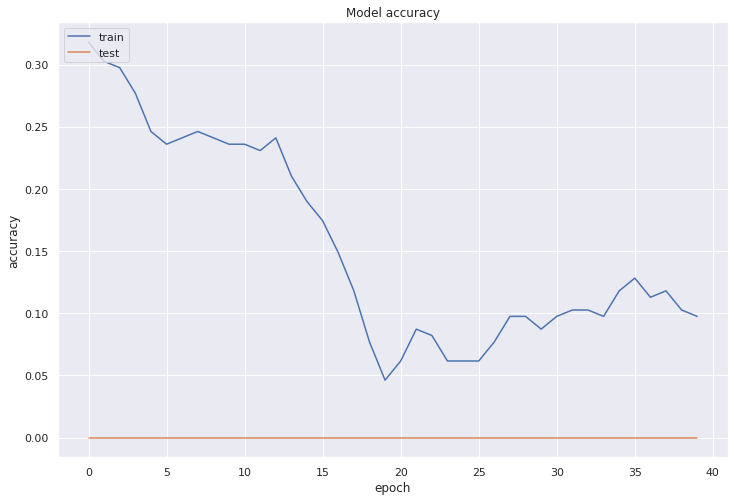

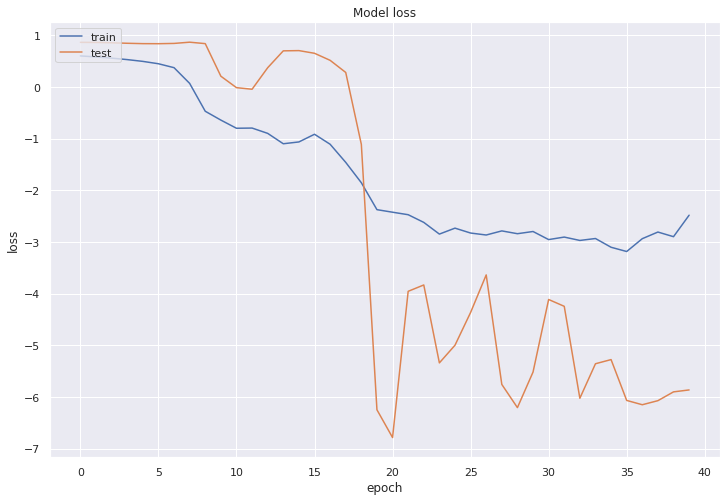


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 13ms/step - loss: 0.6111 - acc: 0.3026 - val_loss: 0.5696 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/40
195/195 [==============================] - 0s 523us/step - loss: 0.5863 - acc: 0.2923 - val_loss: 0.5461 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/40
195/195 [==============================] - 0s 577us/step - loss: 0.5593 - acc: 0.2769 - val_loss: 0.5233 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/40
195/195 [==============================] - 0s 540us/step - loss: 0.5337 - acc: 0.2308 - val_loss: 0.4993 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/40
195/195 [==============================] - 0s 504us/step - loss: 0.4889 - acc: 0.2308 - val_loss: 0.4733 - val_acc: 0.0000e+00

Epoch 000

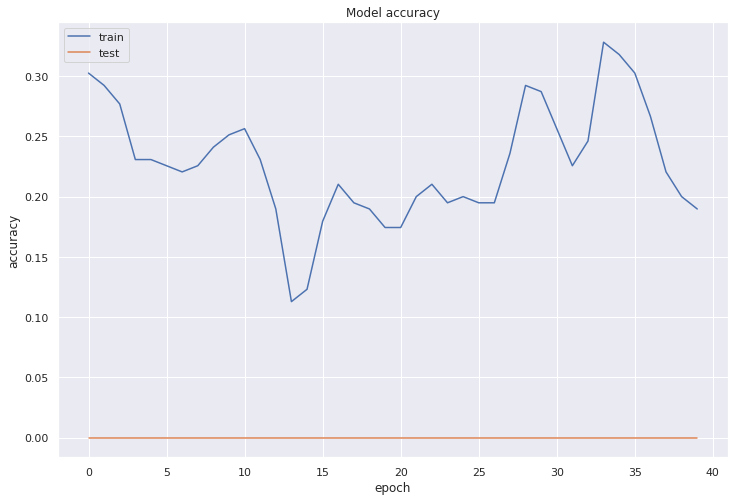

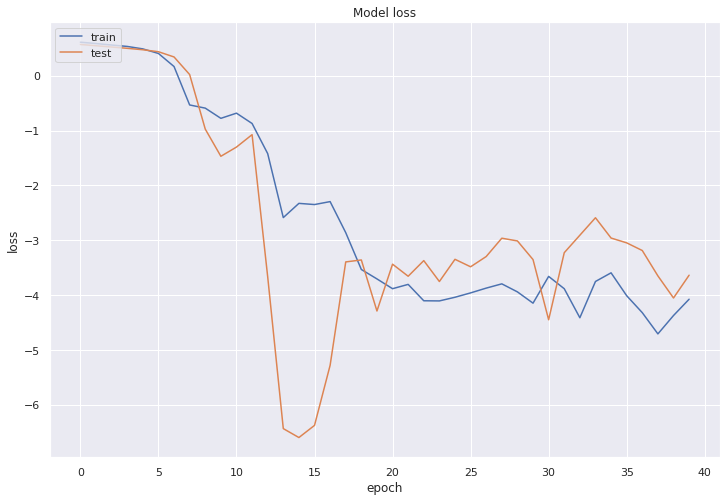


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 2s 13ms/step - loss: 0.5857 - acc: 0.2256 - val_loss: 0.5930 - val_acc: 0.5714

Epoch 00001: val_acc improved from -inf to 0.57143, saving model to best_model_loss_f.pkl
Epoch 2/40
195/195 [==============================] - 0s 568us/step - loss: 0.5561 - acc: 0.2051 - val_loss: 0.6005 - val_acc: 0.5238

Epoch 00002: val_acc did not improve from 0.57143
Epoch 3/40
195/195 [==============================] - 0s 490us/step - loss: 0.5204 - acc: 0.1744 - val_loss: 0.6081 - val_acc: 0.5238

Epoch 00003: val_acc did not improve from 0.57143
Epoch 4/40
195/195 [==============================] - 0s 489us/step - loss: 0.4754 - acc: 0.1692 - val_loss: 0.6155 - val_acc: 0.4762

Epoch 00004: val_acc did not improve from 0.57143
Epoch 5/40
195/195 [==============================] - 0s 504us/step - loss: 0.3968 - acc: 0.1692 - val_loss: 0.6240 - val_acc: 0.4762

Epoch 00005: val_acc did not 

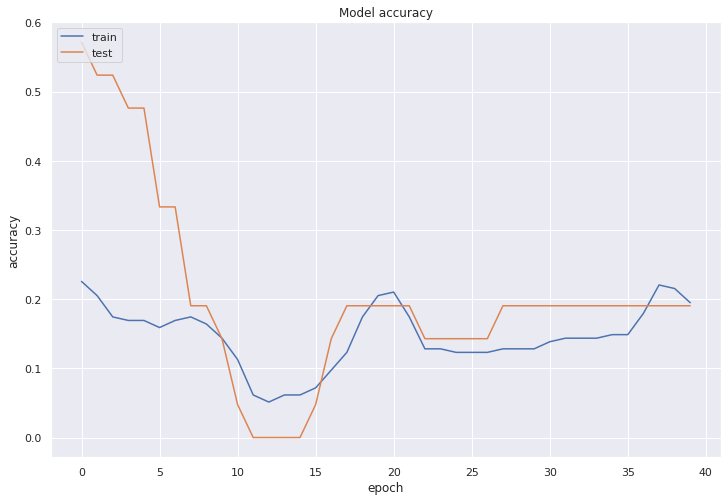

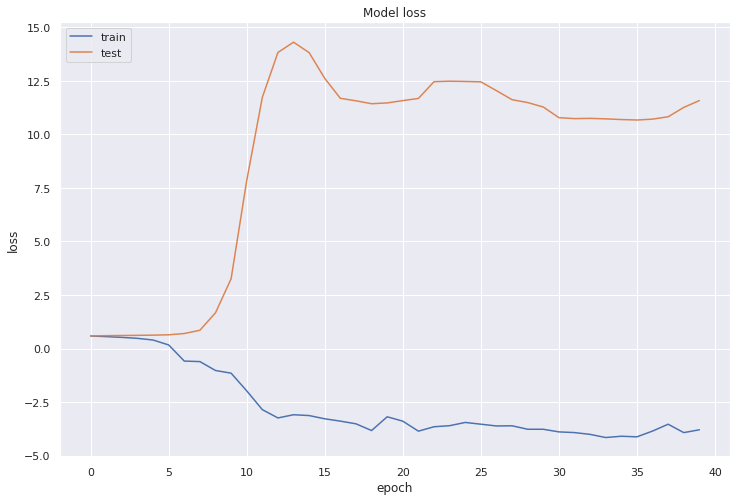


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/40
195/195 [==============================] - 3s 13ms/step - loss: 0.5588 - acc: 0.2462 - val_loss: 0.5328 - val_acc: 0.2857

Epoch 00001: val_acc improved from -inf to 0.28571, saving model to best_model_loss_f.pkl
Epoch 2/40
195/195 [==============================] - 0s 532us/step - loss: 0.5332 - acc: 0.2000 - val_loss: 0.4896 - val_acc: 0.2857

Epoch 00002: val_acc did not improve from 0.28571
Epoch 3/40
195/195 [==============================] - 0s 510us/step - loss: 0.4927 - acc: 0.1949 - val_loss: 0.4341 - val_acc: 0.2857

Epoch 00003: val_acc did not improve from 0.28571
Epoch 4/40
195/195 [==============================] - 0s 511us/step - loss: 0.4311 - acc: 0.1846 - val_loss: 0.3279 - val_acc: 0.2381

Epoch 00004: val_acc did not improve from 0.28571
Epoch 5/40
195/195 [==============================] - 0s 512us/step - loss: 0.2927 - acc: 0.1949 - val_loss: -0.0340 - val_acc: 0.1905

Epoch 00005: val_acc did no

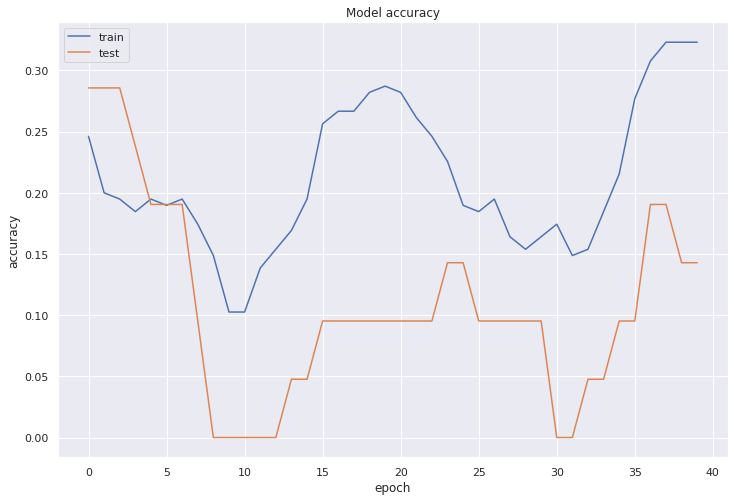

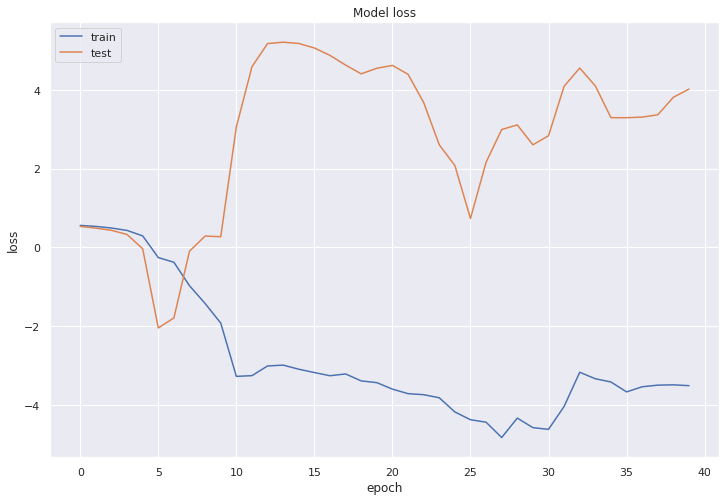

24.03% (+/- 19.29%)


In [44]:
_lstm_loss_f_model = lstm_model(loss_f='mean_squared_error')
cvscores_loss_f_model = k_Fold(_lstm_loss_f_model, 'best_model_loss_f')

#### Accuracy Score Plot in K-Fold Cross Validation for batch size model

max:  0.5714285969734192
mean:  0.24025974720716478
std:  0.20337108172337082


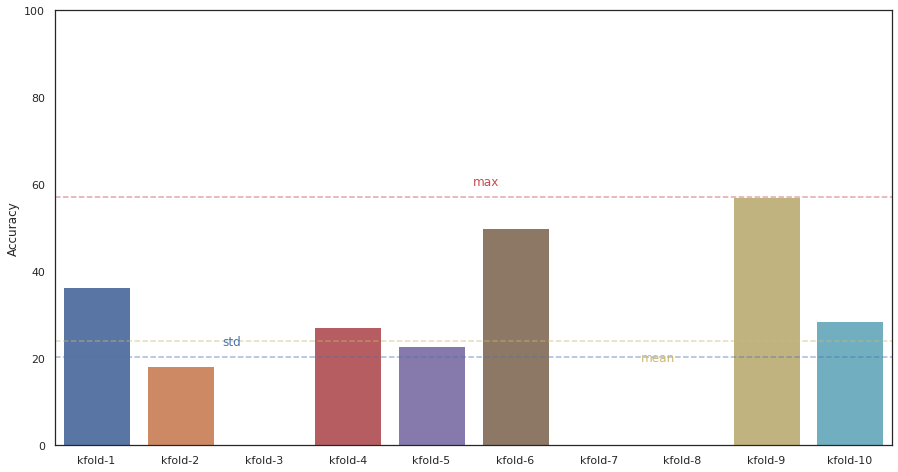

In [45]:
plot_bar_KFold_score(cvscores_loss_f_model)

# 5. Conclusion